# Regional volume trends 

### Author: 
 - Michel Tsamados
 
### Date:
- 10/6/2021

### Code to 
 - calculate monthly regional volumes 
 - plot the trends 
 - over the CryoSat-2 period 2010-2020
 - the PIOMAS period 1980-2020


In [1]:
! pwd

/Users/micheltsamados/Dropbox/OliverRacher copy/PAPER/BUDGET_AWI_NT_Kimura/Step6/BudgetPaper/notebooks


In [380]:
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset

import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


from sys import path
path.insert(0, '/Users/micheltsamados/Dropbox/OliverRacher copy/PAPER/BUDGET_AWI_NT_Kimura/Harry/Budget_tool-main/')
# import data_year as dy
import grid_set as gs

import glob
import scipy.io
from scipy.interpolate import griddata

import scipy.stats as stats


from mpl_toolkits.axes_grid1.inset_locator import inset_axes


### Load master array

In [567]:
variables_all_new_same_grid_array_pathfinder_compact_array_model_mask4_float16=np.load('/Users/micheltsamados/Desktop/20210513/variables_all_new_same_grid_array_pathfinder_compact_array_model_mask4_float16.npy')



In [566]:
variables_all_new_same_grid_array_pathfinder_compact_array_model_float16=np.load('/Users/micheltsamados/Desktop/20210513/variables_all_new_same_grid_array_pathfinder_compact_array_model_float16.npy')



In [431]:
#No mask
variables_all_new_same_grid_array_pathfinder_compact_array_model_float16=np.load('/Users/micheltsamados/Desktop/20210513/variables_all_new_same_grid_array_pathfinder_compact_array_model_float16.npy')



#Mask2 
variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16=np.load('/Users/micheltsamados/Desktop/20210513/variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16.npy')

#No mask
growth_oct_apr=np.load('/Users/micheltsamados/Desktop/20210513/variables_all_new_same_grid_array_pathfinder_compact_array_model_growth_ONDJFMA_float16.npy')
growth_nov_mar=np.load('/Users/micheltsamados/Desktop/20210513/variables_all_new_same_grid_array_pathfinder_compact_array_model_growth_NDJFM_float16.npy')
growth_dec_feb=np.load('/Users/micheltsamados/Desktop/20210513/variables_all_new_same_grid_array_pathfinder_compact_array_model_growth_DJF_float16.npy')

#Mask2 
growth_mask2_oct_apr=np.load('/Users/micheltsamados/Desktop/20210513/variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_growth_ONDJFMA_float16.npy')
growth_mask2_nov_mar=np.load('/Users/micheltsamados/Desktop/20210513/variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_growth_NDJFM_float16.npy')
growth_mask2_dec_feb=np.load('/Users/micheltsamados/Desktop/20210513/variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_growth_DJF_float16.npy')


#Mask4
growth_mask4_oct_apr=np.load('/Users/micheltsamados/Desktop/20210513/variables_all_new_same_grid_array_pathfinder_compact_array_model_mask4_growth_ONDJFMA_float16.npy')
growth_mask4_nov_mar=np.load('/Users/micheltsamados/Desktop/20210513/variables_all_new_same_grid_array_pathfinder_compact_array_model_mask4_growth_NDJFM_float16.npy')
growth_mask4_dec_feb=np.load('/Users/micheltsamados/Desktop/20210513/variables_all_new_same_grid_array_pathfinder_compact_array_model_mask4_growth_DJF_float16.npy')





In [432]:
growth_mask2_oct_apr.shape

(21, 10, 11, 361, 361)

/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


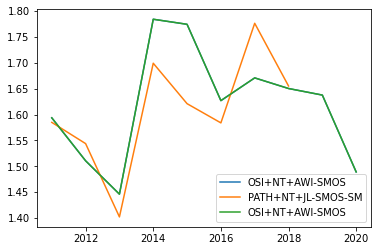

In [370]:
x1 = np.linspace(2010,2020,11)

field=variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var]
field_avg=np.nanmean(field,(2,3))
# field_avg.shape
plt.plot(x1,field_avg[:,11],label=list_names[index])
index=5
field=variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var]
field_avg=np.nanmean(field,(2,3))
plt.plot(x1,field_avg[:,11],label=list_names[index])
index=9
field=variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var]
field_avg=np.nanmean(field,(2,3))
plt.plot(x1,field_avg[:,11],label=list_names[index])
plt.legend()

In [11]:
variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16.shape

(21, 10, 11, 12, 361, 361)

### List of variables 

In [49]:
list_variables=['intensification','divergence','advection','residual','dynamics','thickness','concentration','ice_drift_x','ice_drift_y','data_count']



### Masking array

In [10]:
# # #mask where data everywhere
# mask_joint=ma.zeros( (10, 11, 12, 361, 361) )
# for l in range(17):
#     mask_joint=mask_joint+variables_all_new_same_grid_array_pathfinder_compact_array_model_float16[l]
    
# mask_joint2=ma.zeros( (10, 11, 12, 361, 361) )
# for y in range(11):
#     mask_joint2[:,y]=np.sum(mask_joint[:,3:8],1) 

In [48]:

list_valid_vct=np.load('../../list_valid_vct.npy')
# list_drift=['PATH','OSI','KIM']
# list_conc=['NT','BT']
list_drift=['PATH','OSI','KIM']
list_conc=['NT','BT']
list_thick=['AWI-SMOS','AWI','CPOM','JL-SMOS-SM','JL-SM','JL-SMOS','JL']
list_names=[]
dir_names=[]
for l in list_valid_vct:
    print(l,list_drift[l[0]]+'+'+list_conc[l[1]]+'+'+list_thick[l[2]])
    list_names.append(list_drift[l[0]]+'+'+list_conc[l[1]]+'+'+list_thick[l[2]])
list_names.append('PIOMAS')
list_names.append('CICE')   

[0 0 0] PATH+NT+AWI-SMOS
[0 1 0] PATH+BT+AWI-SMOS
[0 0 1] PATH+NT+AWI
[0 0 2] PATH+NT+CPOM
[0 1 2] PATH+BT+CPOM
[0 0 3] PATH+NT+JL-SMOS-SM
[0 0 4] PATH+NT+JL-SM
[0 0 5] PATH+NT+JL-SMOS
[0 0 6] PATH+NT+JL
[1 0 0] OSI+NT+AWI-SMOS
[1 1 0] OSI+BT+AWI-SMOS
[1 0 1] OSI+NT+AWI
[1 0 2] OSI+NT+CPOM
[1 0 3] OSI+NT+JL-SMOS-SM
[1 1 4] OSI+BT+JL-SM
[2 0 1] KIM+NT+AWI
[2 0 2] KIM+NT+CPOM


In [55]:
depth_.shape

(881, 609)

### Simple plot

/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


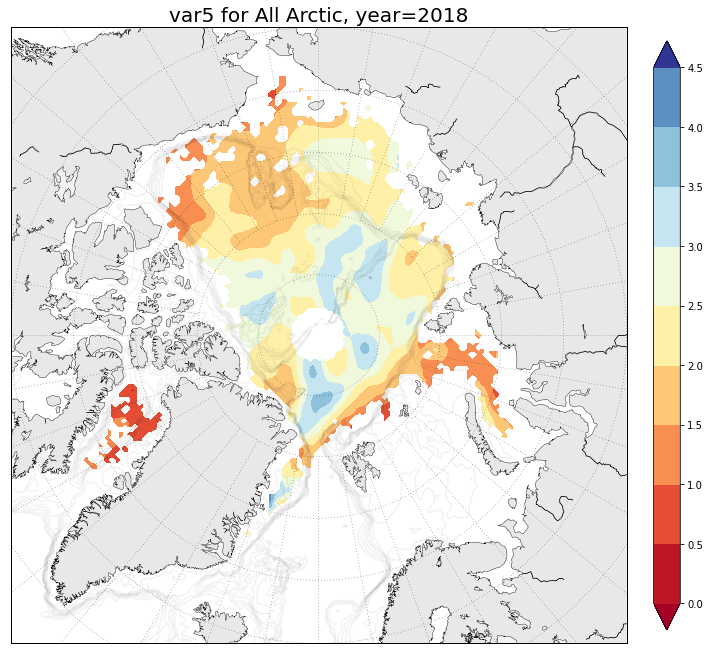

In [555]:
sea_names=['Sea of ????','Sea of ????','Sea of Okhotsk','Bering Sea','Hudson Bay','Labrador Sea','Baffin Bay','Fram Strait','Barents Sea','Kara Sea','Laptev Sea','East Siberian Sea','Chuckchi Sea','Beaufort Sea','Canadian Archipelago','Central Arctic','All Arctic','Peripheral Seas','18?','19?','20?']


def Plot_variable_ice_type(year,var,r,index,budget,llevels,vmin,vmax,lon,lat,depth,title,filename):
    plt.figure(figsize=(12,12))    
    year_str = '%02d' % (year+2010)
#     month_str = '%02d' % (month+1)
    # budget[NSIDC_Osisaf_nn!=15]=np.nan
    m = Basemap(projection='npstere',boundinglat=65,lon_0=0, resolution='l')
    m.drawcoastlines(linewidth=0.4)
    m.fillcontinents(color='lightgray',lake_color='white', alpha=0.5)
    m.drawmapboundary(fill_color='white')
    m.drawparallels(np.arange(60,90,5),linewidth=0.5, dashes=[1,5])
    m.drawmeridians(np.arange(0,360,10),linewidth=0.5, dashes=[1,5])
    llevels1 = np.arange(-2000,0,250) # check etopo.ravel().max()
    x, y = m(lon, lat)
    s = m.contour(x, y, -depth, vmin=-8000, vmax=0,levels=llevels1,colors='k', linestyles='-',alpha=0.05)
    llevels2 = np.arange(2,3,1) # check etopo.ravel().max()
#     if lon.shape[0]==361:
#         xtest, ytest = m(lon_Osisaf, lat_Osisaf)
#         icetype2=griddata((xtest.ravel(), ytest.ravel()),icetype.ravel(), (x, y), method='nearest')
# #         s = m.contour(x, y, icetype2, vmin=2, vmax=3,levels=llevels2,colors='r', linestyles='-',alpha=0.3)

    my_cmap=plt.cm.RdYlBu
    #my_cmap=plt.cm.bwr_r
    llevels = llevels

    s = m.contourf(x, y, budget, vmin=vmin, vmax=vmax,levels=llevels,cmap=my_cmap, extend='both',alpha=1.) 


    plt.title(title+', year='+year_str,fontsize=20)
    plt.colorbar(s,fraction=0.04, pad=0.04)
#     plt.savefig('MonthlyBudgets/budget_ice_type/out_OSISAF_nt_AWI_SMOS_components_'+title+'_'+year_str+'_'+month_str+'.png', dpi=100)

year=8
month=3
var=5
vmin=0
vmax=5
r=16
index=5
llevels=np.arange(0,5,0.5) 
lon=lon_Pathfinder
lat=lat_Pathfinder

#plot=np.mean(variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var,1:10,month],0)
plot=variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var,year,month]


Plot_variable_ice_type(year,var,r,index,plot,llevels,vmin,vmax,lon,lat,depth_Pathfinder_nn,title='var'+str(var)+' for '+sea_names[r], filename='index'+str(0)+'_var'+str(var)+'_r'+str(16)+'_year'+str(year)+'_nomask')



In [192]:
plot.shape

(361, 361)

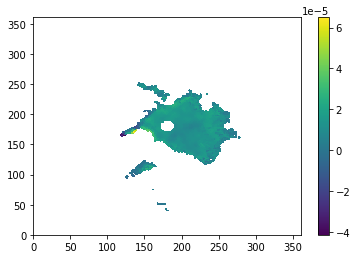

In [530]:
year=9
# month=10
var=3
vmin=0
vmax=5
r=16
index=9
plot=growth_mask2_nov_mar[index,var,year]


llevels=np.arange(0,5,0.5) 
# lon=lon_Pathfinder
# lat=lat_Pathfinder
# plot.shape
plt.pcolor(plot)
plt.colorbar()

### Calculate trends 

In [557]:
###############################################################################################
# Function to calculate the spatial mean of one field and write the trends in .dat files
# returns
#          ---> trend_time[year]
#          ---> trend_space[x,y]
#
# Similar code by Alek Petty
##############################################################################################

def cal_trend(start_year, num_years, start_month, num_months, nx, ny, field):

# Initialize
        x = nx
        y = ny

##################
# Maps of trends
##################

# Monthly averaged
        num_years
        years = np.arange(num_years)
        trend_ym = np.zeros((num_months, x, y))
        sig_a_ym = np.zeros((num_months, x, y))
        r_a_ym = np.zeros((num_months, x, y))
        int_a_ym = np.zeros((num_months, x, y))

        for month in range(num_months):
                print (month)
                field_y = np.mean(field,1)
                for i in range(x):
                        print(i)
                        for j in range(y):
                                slope, intercept, r, prob, stderr = stats.linregress(years,field[start_year:start_year+num_years, month, i, j])
                                trend_ym[month, i, j] = slope
                                sig_a_ym[month, i, j] = 100*(1-prob)
                                r_a_ym[month, i, j] = r
                                int_a_ym[month, i, j] = intercept

# Yearly averaged
        years = np.arange(num_years)
        trend = np.zeros((x, y))
        sig_a = np.zeros((x, y))
        r_a = np.zeros((x, y))
        int_a = np.zeros((x, y))

        for i in range(x):
                for j in range(y):
                        slope, intercept, r, prob, stderr = stats.linregress(years,field_y[start_year:start_year+num_years, i, j])
                        trend[i, j] = slope
                        sig_a[i, j] = 100*(1-prob)
                        r_a[i, j] = r
                        int_a[i, j] = intercept

        return trend, trend_ym, sig_a, sig_a_ym, r_a, r_a_ym, int_a, int_a_ym

In [448]:
###############################################################################################
# Function to calculate the spatial mean of one field and write the trends in .dat files
# returns
#          ---> trend_time[year]
#          ---> trend_space[x,y]
#
# Similar code by Alek Petty
##############################################################################################

def cal_trend_simple(start_year, num_years, nx, ny, field):

# Initialize
        x = nx
        y = ny

##################
# Maps of trends
##################

# Monthly averaged
        num_years
        years = np.arange(num_years)
        trend = np.zeros((x, y))
        sig_a = np.zeros((x, y))
        r_a = np.zeros((x, y))
        int_a = np.zeros((x, y))

        for i in range(x):
                print(i)
                for j in range(y):
                        slope, intercept, r, prob, stderr = stats.linregress(years,field[start_year:start_year+num_years, i, j])
                        trend[i, j] = slope
                        sig_a[i, j] = 100*(1-prob)
                        r_a[i, j] = r
                        int_a[i, j] = intercept


        return trend, sig_a, r_a, int_a

In [90]:
variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16.shape

(21, 10, 11, 12, 361, 361)

/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


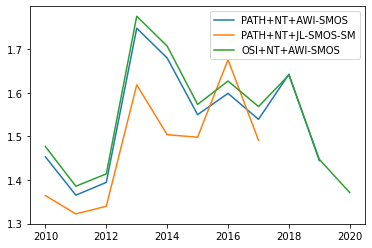

In [374]:
x1 = np.linspace(2010,2020,11)

index=0
field=variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var]
field_avg=np.nanmean(field,(2,3))
# field_avg.shape
plt.plot(x1,field_avg[:,11],label=list_names[index])
index=5
field=variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var]
field_avg=np.nanmean(field,(2,3))
plt.plot(x1,field_avg[:,11],label=list_names[index])
index=9
field=variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var]
field_avg=np.nanmean(field,(2,3))
plt.plot(x1,field_avg[:,11],label=list_names[index])
plt.legend()

### Loop over var, index, month

In [444]:
growth_mask2_oct_apr.shape

(21, 10, 11, 361, 361)

In [531]:
trends_dictionnary={}
for var in range(4):
    trends_dictionnary[var]={}
    for index in range(21):
        print(var,index)
        trends_dictionnary[var][index]={}
#         var=3
#         index=5
        start_year=0
        num_years=8
        # start_month=0
        # num_months=1

        field=100*86400*growth_mask2_nov_mar[index,var]
        nx=field.shape[1]
        ny=field.shape[2]
        trend, sig_a, r_a, int_a = cal_trend_simple(start_year, num_years, nx, ny, field)
        trends_dictionnary[var][index]['2010/2017 trend']=trend
        trends_dictionnary[var][index]['2010/2017 sig_a']=sig_a
        trends_dictionnary[var][index]['2010/2017 r_a']=r_a


        start_year=0
        num_years=9
        # start_month=0
        # num_months=1

        field=100*86400*growth_mask2_nov_mar[index,var]
        nx=field.shape[1]
        ny=field.shape[2]
        trend, sig_a, r_a, int_a = cal_trend_simple(start_year, num_years, nx, ny, field)
        trends_dictionnary[var][index]['2010/2018 trend']=trend
        trends_dictionnary[var][index]['2010/2018 sig_a']=sig_a
        trends_dictionnary[var][index]['2010/2018 r_a']=r_a
        
        if index==9:
            start_year=0
            num_years=10
            # start_month=0
            # num_months=1

            field=100*86400*growth_mask2_nov_mar[index,var]
            nx=field.shape[1]
            ny=field.shape[2]
            trend, sig_a, r_a, int_a = cal_trend_simple(start_year, num_years, nx, ny, field)
            trends_dictionnary[var][index]['2010/2019 trend']=trend
            trends_dictionnary[var][index]['2010/2019 sig_a']=sig_a
            trends_dictionnary[var][index]['2010/2019 r_a']=r_a            

0 0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
27

/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/numpy/lib/function_base.py:2474: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
3

144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
0 6
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45


189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
0 9
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
10

234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
15

281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
19

325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
24

18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
28

80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334


130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
1 6
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
2

176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
1 9
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88

221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
13

267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
18

313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
22

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
3

119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
2 6
0
1
2
3
4
5
6
7
8
9
10
11
12

164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
2 9
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72

211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
12

255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
17

299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
21

345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
26

43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
3

104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353


149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
3 9
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52

194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
11

241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
15

285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
20

331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
24

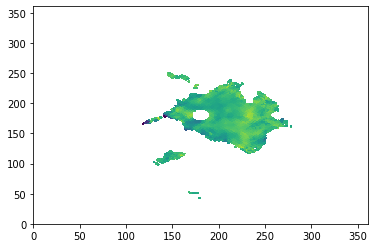

In [535]:
plt.pcolor(trends_dictionnary[3][9]['2010/2019 trend'])

In [573]:
var=5
index=5

start_year=1
num_years=8
start_month=3
num_months=1

#field=variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var]
field=variables_all_new_same_grid_array_pathfinder_compact_array_model_float16[index,var]

nx=field.shape[2]
ny=field.shape[3]

trend, trend_ym, sig_a, sig_a_ym, r_a, r_a_ym, int_a, int_a_ym = cal_trend(start_year, num_years, start_month, num_months, nx, ny, field)


0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


In [423]:
#Loop for residual 
var=3
index=5
nx=field.shape[2]
ny=field.shape[3]
start_year=1
num_years=8
start_month=0
num_months=1

field=86400*variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var]
trend, trend_ym, sig_a, sig_a_ym, r_a, r_a_ym, int_a, int_a_ym = cal_trend(start_year, num_years, start_month, num_months, nx, ny, field)



0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


In [427]:
#Loop for concentration  
var=6
index=5
nx=field.shape[2]
ny=field.shape[3]
start_year=1
num_years=8
start_month=0
num_months=1

field=100*variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var]
trend, trend_ym, sig_a, sig_a_ym, r_a, r_a_ym, int_a, int_a_ym = cal_trend(start_year, num_years, start_month, num_months, nx, ny, field)




/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


In [421]:
var=3
index=5
nx=field.shape[2]
ny=field.shape[3]
start_year=1
num_years=8
start_month=0
num_months=1

field=variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var]
trend, trend_ym, sig_a, sig_a_ym, r_a, r_a_ym, int_a, int_a_ym = cal_trend(start_year, num_years, start_month, num_months, nx, ny, 86400*field*area_array0/1e9)



0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


In [417]:
area_array0

array([[6.52384309e+08, 6.52069838e+08, 6.51780670e+08, ...,
        6.52437048e+08, 6.52713437e+08, 6.52369083e+08],
       [6.52074887e+08, 6.51779902e+08, 6.51486634e+08, ...,
        6.52142104e+08, 6.52426230e+08, 6.52059697e+08],
       [6.51780670e+08, 6.51491673e+08, 6.51206349e+08, ...,
        6.51850037e+08, 6.52102011e+08, 6.51765691e+08],
       ...,
       [6.52421762e+08, 6.52131991e+08, 6.51834891e+08, ...,
        6.52489294e+08, 6.52763281e+08, 6.52396559e+08],
       [6.52733700e+08, 6.52421140e+08, 6.52137374e+08, ...,
        6.52783401e+08, 6.53057972e+08, 6.52713437e+08],
       [6.52384309e+08, 6.52069838e+08, 6.51780670e+08, ...,
        6.52437048e+08, 6.52713437e+08, 6.52369083e+08]])

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 5.000e+00, 6.000e+00, 2.200e+01, 1.800e+01, 5.200e+01,
        1.040e+02, 1.080e+02, 1.680e+02, 2.230e+02, 3.550e+02, 4.140e+02,
        4.860e+02, 8.140e+02, 1.855e+03, 2.462e+03, 1.425e+03, 3.960e+02,
        7.800e+01, 4.900e+01, 1.400e+01, 1.300e+01, 8.000e+00, 6.000e+00,
        4.000e+00, 4.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        4.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([-2.84933036, -2.71593192, -2.58253348, -2.44913504, -2.31573661,
        -2.18233817, -2.04893973, -1.91554129, -1.78214286, -1.64874442,
        -1.51534598, -1.38194754, -1.24854911, -1.11515067, -0.98175223,
        -0.84835379, -0.71495536, -0.58155692, -0.44815848, -0.31476004,
        -0.18136161, -0.04796317,  0.08543527,  0.21883371,  0.35223214,
         0.48563058,  0.61902902,  0.75242746,  0.88582589,  1.01922433,
         1.15262277,  1.28602121,  1.41941964,  1.55281808,  1.6

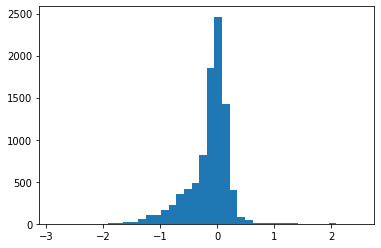

In [428]:
plt.hist(trend_ym[0].ravel(),bins=40)

/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


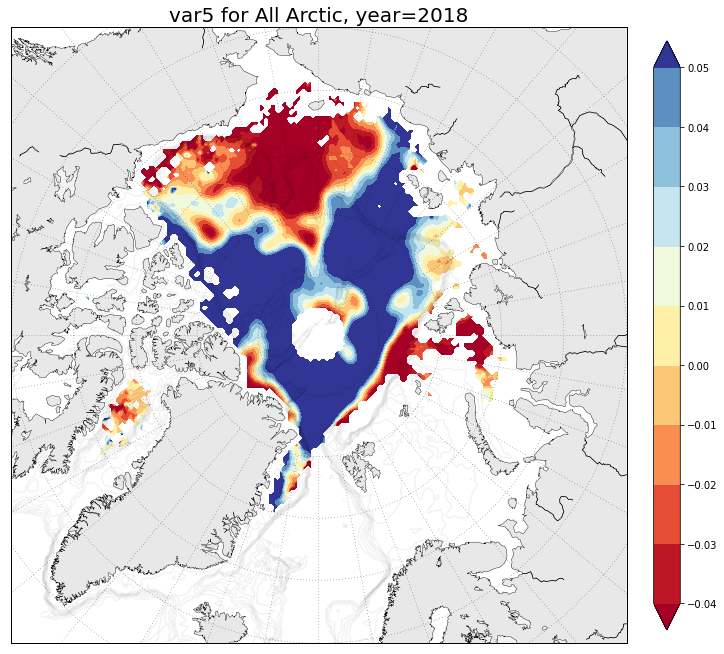

In [344]:
llevels=np.arange(-0.04,0.06,0.01) 
vmin=-0.04
vmax=0.06
Plot_variable_ice_type(year,var,r,index,trend_ym[0],llevels,vmin,vmax,lon,lat,depth_Pathfinder_nn,title='var'+str(var)+' for '+sea_names[r], filename='index'+str(0)+'_var'+str(var)+'_r'+str(16)+'_year'+str(year)+'_nomask')



-0.10400000000000001 0.10410000000000001 0.016


/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:89: RuntimeWarning: Mean of empty slice


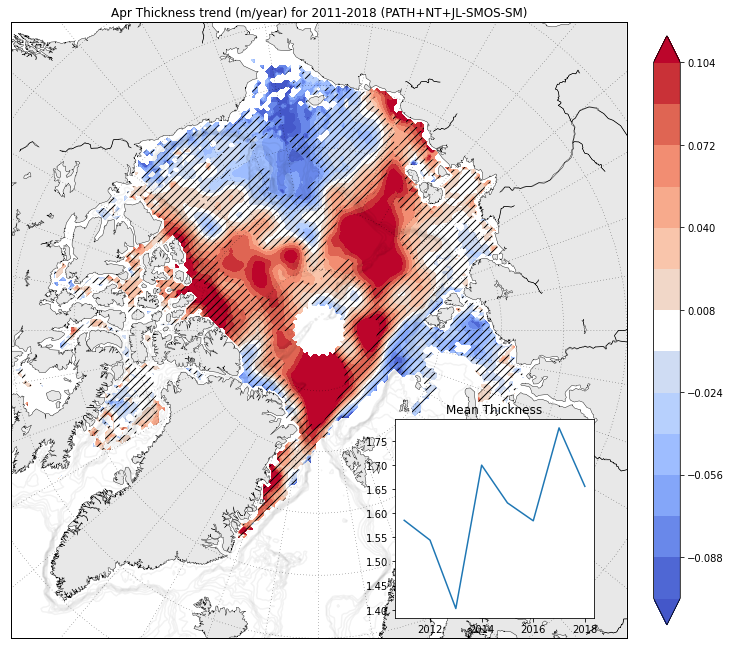

In [574]:
biasContDist=0.016
rgrColorTable=np.array(['#4457c9','#4f67d4','#6988ea','#84a6f9','#9ebdff','#b7d0fd','#cfdcf3','#ffffff','#f1d7c8','#f9c5ab','#f7aa8c','#f28d72','#df6553','#c93137','#bc052b'])
iContNr=len(rgrColorTable)
iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-iMinMax,iMinMax+0.0001,biasContDist)
print(-iMinMax,iMinMax+0.0001,biasContDist)

plt.figure(figsize=(12,12))    
year_str = '%02d' % (year+2010)
#     month_str = '%02d' % (month+1)
# budget[NSIDC_Osisaf_nn!=15]=np.nan
m = Basemap(projection='npstere',boundinglat=65,lon_0=0, resolution='l')
m.drawcoastlines(linewidth=0.4)
m.fillcontinents(color='lightgray',lake_color='white', alpha=0.5)
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(60,90,5),linewidth=0.5, dashes=[1,5])
m.drawmeridians(np.arange(0,360,10),linewidth=0.5, dashes=[1,5])
llevels1 = np.arange(-2000,0,250) # check etopo.ravel().max()
x, y = m(lon, lat)
s = m.contour(x, y, -depth_Pathfinder_nn, vmin=-8000, vmax=0,levels=llevels1,colors='k', linestyles='-',alpha=0.05)
llevels2 = np.arange(2,3,1) # check etopo.ravel().max()
#     if lon.shape[0]==361:
#         xtest, ytest = m(lon_Osisaf, lat_Osisaf)
#         icetype2=griddata((xtest.ravel(), ytest.ravel()),icetype.ravel(), (x, y), method='nearest')
# #         s = m.contour(x, y, icetype2, vmin=2, vmax=3,levels=llevels2,colors='r', linestyles='-',alpha=0.3)

my_cmap=plt.cm.RdYlBu
#my_cmap=plt.cm.bwr_r
#     llevels = llevels

#     cs = m.contour(x, y, plot2, hatches=['','///'],levels=[0,90,100], zorder=1, alpha=0)
#     m.contourf(x, y, plot2, levels=levels, hatches=["", "."], alpha=0)

#     s = m.contourf(x, y, plot, vmin=vmin, vmax=vmax,levels=llevels,cmap=my_cmap, extend='both',alpha=1.) 
s = m.contourf(x, y, trend_ym[0], colors=rgrColorTable, extend='both',levels=clevsTD)#, zorder=0)
#     levels = [plot2.min(), 20, plot2.max()]
#     m.contourf(x, y, plot2, levels=levels, hatches=["", "."], alpha=0)
m.contourf(x, y, sig_a_ym[0],levels=[0,80,100], hatches=['///',''],alpha=0)


#     plt.title(title+', year='+year_str,fontsize=20)
plt.title('Apr Thickness trend (m/year) for 2011-2018 ('+list_names[index]+')')


plt.colorbar(s,fraction=0.04, pad=0.04)

# # inset = inset_axes(0.705, 0.44, 0.14, 0.14)
# # inset = inset_axes(s, "30%", "40%", loc="lower right")

# x1 = np.linspace(2010,2020,11)
# index=5
# field=variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var]
# y1=np.nanmean(field,(2,3))
# # field_avg.shape
# inset.plot(x1,field_avg[:,11],label=list_names[index])

# # inset.set_title('E. Siberian')

# inset.plot(x1,y1)


# reg = linregress(x1,y1)    



# inset.plot([np.min(x),np.max(x)],
#      [np.min(x)*reg[0]+reg[1],
#       np.max(x)*reg[0]+reg[1] ],
#       color='k',ls='--')


# inset.annotate(xy=(0.99,0.02),ha='right',
#        text=f'{np.round(reg[0],decimals=2)}',
#        xycoords='axes fraction',
#        fontsize='x-large')


# inset.set_yticklabels([])
# inset.set_xticklabels([])



# this is an inset axes over the main axes
a = plt.axes([0.57, 0.17 , 0.23, 0.23])#, facecolor='y')
# n, bins, patches = plt.hist(s, 400, normed=1)
x1 = np.linspace(2011,2018,8)
index=5
field=variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var]
y1=np.nanmean(field,(2,3))[1:9,0]
# reg = linregress(x1,y1)    


# field_avg.shape
plt.plot(x1,y1,label=list_names[index])
# plt.plot([np.min(x1),np.max(x1)],
#      [np.min(x1)*reg[0]+reg[1],
#       np.max(x1)*reg[0]+reg[1] ],
#       color='k',ls='--')

# inset.annotate(xy=(0.99,0.02),ha='right',
#        text=f'{np.round(reg[0],decimals=2)}',
#        xycoords='axes fraction',
#        fontsize='x-large')


plt.title('Mean Thickness')
# plt.xticks([])
# plt.yticks([])




plt.savefig('/Users/micheltsamados/Desktop/AprThickTrendIndex5.png', dpi=400)



-0.10400000000000001 0.10410000000000001 0.016


/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Text(0.5, 1.0, 'Mean Thickness')

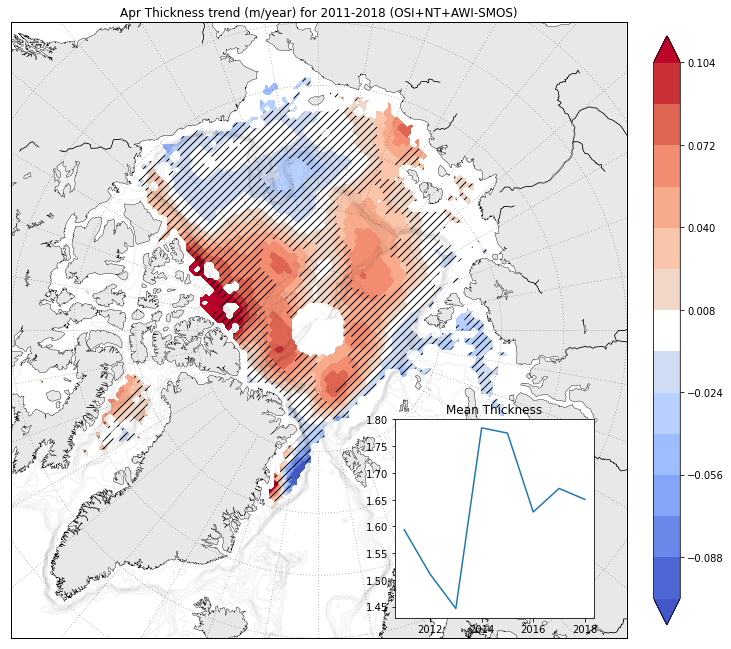

In [565]:
biasContDist=0.016
rgrColorTable=np.array(['#4457c9','#4f67d4','#6988ea','#84a6f9','#9ebdff','#b7d0fd','#cfdcf3','#ffffff','#f1d7c8','#f9c5ab','#f7aa8c','#f28d72','#df6553','#c93137','#bc052b'])
iContNr=len(rgrColorTable)
iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-iMinMax,iMinMax+0.0001,biasContDist)
print(-iMinMax,iMinMax+0.0001,biasContDist)

plt.figure(figsize=(12,12))    
year_str = '%02d' % (year+2010)
#     month_str = '%02d' % (month+1)
# budget[NSIDC_Osisaf_nn!=15]=np.nan
m = Basemap(projection='npstere',boundinglat=65,lon_0=0, resolution='l')
m.drawcoastlines(linewidth=0.4)
m.fillcontinents(color='lightgray',lake_color='white', alpha=0.5)
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(60,90,5),linewidth=0.5, dashes=[1,5])
m.drawmeridians(np.arange(0,360,10),linewidth=0.5, dashes=[1,5])
llevels1 = np.arange(-2000,0,250) # check etopo.ravel().max()
x, y = m(lon, lat)
s = m.contour(x, y, -depth_Pathfinder_nn, vmin=-8000, vmax=0,levels=llevels1,colors='k', linestyles='-',alpha=0.05)
llevels2 = np.arange(2,3,1) # check etopo.ravel().max()
#     if lon.shape[0]==361:
#         xtest, ytest = m(lon_Osisaf, lat_Osisaf)
#         icetype2=griddata((xtest.ravel(), ytest.ravel()),icetype.ravel(), (x, y), method='nearest')
# #         s = m.contour(x, y, icetype2, vmin=2, vmax=3,levels=llevels2,colors='r', linestyles='-',alpha=0.3)

my_cmap=plt.cm.RdYlBu
#my_cmap=plt.cm.bwr_r
#     llevels = llevels

#     cs = m.contour(x, y, plot2, hatches=['','///'],levels=[0,90,100], zorder=1, alpha=0)
#     m.contourf(x, y, plot2, levels=levels, hatches=["", "."], alpha=0)

#     s = m.contourf(x, y, plot, vmin=vmin, vmax=vmax,levels=llevels,cmap=my_cmap, extend='both',alpha=1.) 
s = m.contourf(x, y, trend_ym[0], colors=rgrColorTable, extend='both',levels=clevsTD)#, zorder=0)
#     levels = [plot2.min(), 20, plot2.max()]
#     m.contourf(x, y, plot2, levels=levels, hatches=["", "."], alpha=0)
m.contourf(x, y, sig_a_ym[0],levels=[0,80,100], hatches=['///',''],alpha=0)


#     plt.title(title+', year='+year_str,fontsize=20)
plt.title('Apr Thickness trend (m/year) for 2011-2018 ('+list_names[index]+')')


plt.colorbar(s,fraction=0.04, pad=0.04)

# # inset = inset_axes(0.705, 0.44, 0.14, 0.14)
# # inset = inset_axes(s, "30%", "40%", loc="lower right")

# x1 = np.linspace(2010,2020,11)
# index=5
# field=variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var]
# y1=np.nanmean(field,(2,3))
# # field_avg.shape
# inset.plot(x1,field_avg[:,11],label=list_names[index])

# # inset.set_title('E. Siberian')

# inset.plot(x1,y1)


# reg = linregress(x1,y1)    



# inset.plot([np.min(x),np.max(x)],
#      [np.min(x)*reg[0]+reg[1],
#       np.max(x)*reg[0]+reg[1] ],
#       color='k',ls='--')


# inset.annotate(xy=(0.99,0.02),ha='right',
#        text=f'{np.round(reg[0],decimals=2)}',
#        xycoords='axes fraction',
#        fontsize='x-large')


# inset.set_yticklabels([])
# inset.set_xticklabels([])



# this is an inset axes over the main axes
a = plt.axes([0.57, 0.17 , 0.23, 0.23])#, facecolor='y')
# n, bins, patches = plt.hist(s, 400, normed=1)
x1 = np.linspace(2011,2018,8)
index=9
field=variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var]
y1=np.nanmean(field,(2,3))[1:9,0]
# reg = linregress(x1,y1)    


# field_avg.shape
plt.plot(x1,y1,label=list_names[index])
# plt.plot([np.min(x1),np.max(x1)],
#      [np.min(x1)*reg[0]+reg[1],
#       np.max(x1)*reg[0]+reg[1] ],
#       color='k',ls='--')

# inset.annotate(xy=(0.99,0.02),ha='right',
#        text=f'{np.round(reg[0],decimals=2)}',
#        xycoords='axes fraction',
#        fontsize='x-large')


plt.title('Mean Thickness')
# plt.xticks([])
# plt.yticks([])



-0.10400000000000001 0.10410000000000001 0.016


/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:89: RuntimeWarning: Mean of empty slice


Text(0.5, 1.0, 'Mean Thickness')

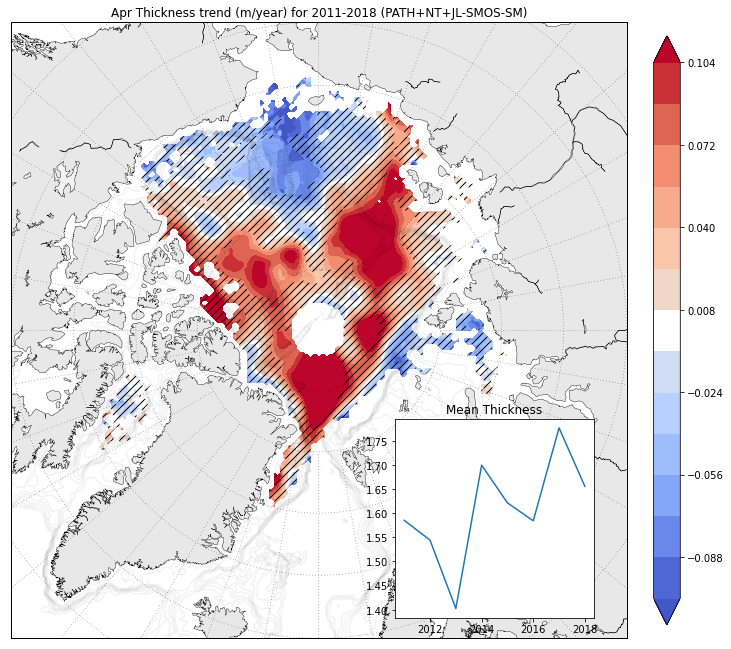

In [563]:
biasContDist=0.016
rgrColorTable=np.array(['#4457c9','#4f67d4','#6988ea','#84a6f9','#9ebdff','#b7d0fd','#cfdcf3','#ffffff','#f1d7c8','#f9c5ab','#f7aa8c','#f28d72','#df6553','#c93137','#bc052b'])
iContNr=len(rgrColorTable)
iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-iMinMax,iMinMax+0.0001,biasContDist)
print(-iMinMax,iMinMax+0.0001,biasContDist)

plt.figure(figsize=(12,12))    
year_str = '%02d' % (year+2010)
#     month_str = '%02d' % (month+1)
# budget[NSIDC_Osisaf_nn!=15]=np.nan
m = Basemap(projection='npstere',boundinglat=65,lon_0=0, resolution='l')
m.drawcoastlines(linewidth=0.4)
m.fillcontinents(color='lightgray',lake_color='white', alpha=0.5)
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(60,90,5),linewidth=0.5, dashes=[1,5])
m.drawmeridians(np.arange(0,360,10),linewidth=0.5, dashes=[1,5])
llevels1 = np.arange(-2000,0,250) # check etopo.ravel().max()
x, y = m(lon, lat)
s = m.contour(x, y, -depth_Pathfinder_nn, vmin=-8000, vmax=0,levels=llevels1,colors='k', linestyles='-',alpha=0.05)
llevels2 = np.arange(2,3,1) # check etopo.ravel().max()
#     if lon.shape[0]==361:
#         xtest, ytest = m(lon_Osisaf, lat_Osisaf)
#         icetype2=griddata((xtest.ravel(), ytest.ravel()),icetype.ravel(), (x, y), method='nearest')
# #         s = m.contour(x, y, icetype2, vmin=2, vmax=3,levels=llevels2,colors='r', linestyles='-',alpha=0.3)

my_cmap=plt.cm.RdYlBu
#my_cmap=plt.cm.bwr_r
#     llevels = llevels

#     cs = m.contour(x, y, plot2, hatches=['','///'],levels=[0,90,100], zorder=1, alpha=0)
#     m.contourf(x, y, plot2, levels=levels, hatches=["", "."], alpha=0)

#     s = m.contourf(x, y, plot, vmin=vmin, vmax=vmax,levels=llevels,cmap=my_cmap, extend='both',alpha=1.) 
s = m.contourf(x, y, trend_ym[0], colors=rgrColorTable, extend='both',levels=clevsTD)#, zorder=0)
#     levels = [plot2.min(), 20, plot2.max()]
#     m.contourf(x, y, plot2, levels=levels, hatches=["", "."], alpha=0)
m.contourf(x, y, sig_a_ym[0],levels=[0,80,100], hatches=['///',''],alpha=0)


#     plt.title(title+', year='+year_str,fontsize=20)
plt.title('Apr Thickness trend (m/year) for 2011-2018 ('+list_names[index]+')')


plt.colorbar(s,fraction=0.04, pad=0.04)

# # inset = inset_axes(0.705, 0.44, 0.14, 0.14)
# # inset = inset_axes(s, "30%", "40%", loc="lower right")

# x1 = np.linspace(2010,2020,11)
# index=5
# field=variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var]
# y1=np.nanmean(field,(2,3))
# # field_avg.shape
# inset.plot(x1,field_avg[:,11],label=list_names[index])

# # inset.set_title('E. Siberian')

# inset.plot(x1,y1)


# reg = linregress(x1,y1)    



# inset.plot([np.min(x),np.max(x)],
#      [np.min(x)*reg[0]+reg[1],
#       np.max(x)*reg[0]+reg[1] ],
#       color='k',ls='--')


# inset.annotate(xy=(0.99,0.02),ha='right',
#        text=f'{np.round(reg[0],decimals=2)}',
#        xycoords='axes fraction',
#        fontsize='x-large')


# inset.set_yticklabels([])
# inset.set_xticklabels([])



# this is an inset axes over the main axes
a = plt.axes([0.57, 0.17 , 0.23, 0.23])#, facecolor='y')
# n, bins, patches = plt.hist(s, 400, normed=1)
x1 = np.linspace(2011,2018,8)
index=5
field=variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var]
y1=np.nanmean(field,(2,3))[1:9,0]
# reg = linregress(x1,y1)    


# field_avg.shape
plt.plot(x1,y1,label=list_names[index])
# plt.plot([np.min(x1),np.max(x1)],
#      [np.min(x1)*reg[0]+reg[1],
#       np.max(x1)*reg[0]+reg[1] ],
#       color='k',ls='--')

# inset.annotate(xy=(0.99,0.02),ha='right',
#        text=f'{np.round(reg[0],decimals=2)}',
#        xycoords='axes fraction',
#        fontsize='x-large')


plt.title('Mean Thickness')
# plt.xticks([])
# plt.yticks([])


In [561]:
x1 = np.linspace(2011,2018,8)
index=5
field=variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var]
y1=np.nanmean(field,(2,3))[:,0]
y1

/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


array([  inf, 1.585, 1.544, 1.402, 1.699, 1.621, 1.584, 1.776, 1.655,
         inf,   inf], dtype=float16)

-0.10400000000000001 0.10410000000000001 0.016


/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:90: RuntimeWarning: Mean of empty slice


Text(0.5, 1.0, 'Residual (m/year)')

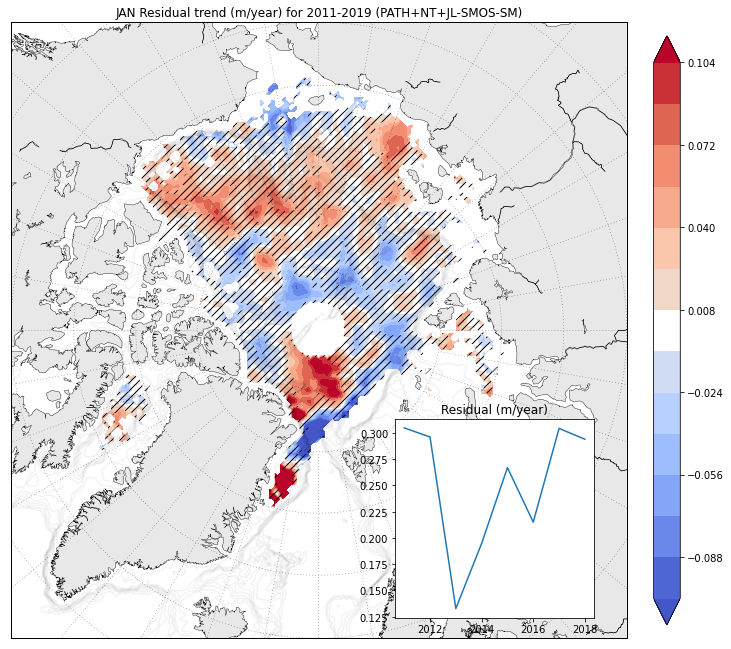

In [426]:
biasContDist=0.016
rgrColorTable=np.array(['#4457c9','#4f67d4','#6988ea','#84a6f9','#9ebdff','#b7d0fd','#cfdcf3','#ffffff','#f1d7c8','#f9c5ab','#f7aa8c','#f28d72','#df6553','#c93137','#bc052b'])
iContNr=len(rgrColorTable)
iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-iMinMax,iMinMax+0.0001,biasContDist)
print(-iMinMax,iMinMax+0.0001,biasContDist)

plt.figure(figsize=(12,12))    
year_str = '%02d' % (year+2010)
#     month_str = '%02d' % (month+1)
# budget[NSIDC_Osisaf_nn!=15]=np.nan
m = Basemap(projection='npstere',boundinglat=65,lon_0=0, resolution='l')
m.drawcoastlines(linewidth=0.4)
m.fillcontinents(color='lightgray',lake_color='white', alpha=0.5)
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(60,90,5),linewidth=0.5, dashes=[1,5])
m.drawmeridians(np.arange(0,360,10),linewidth=0.5, dashes=[1,5])
llevels1 = np.arange(-2000,0,250) # check etopo.ravel().max()
x, y = m(lon, lat)
s = m.contour(x, y, -depth_Pathfinder_nn, vmin=-8000, vmax=0,levels=llevels1,colors='k', linestyles='-',alpha=0.05)
llevels2 = np.arange(2,3,1) # check etopo.ravel().max()
#     if lon.shape[0]==361:
#         xtest, ytest = m(lon_Osisaf, lat_Osisaf)
#         icetype2=griddata((xtest.ravel(), ytest.ravel()),icetype.ravel(), (x, y), method='nearest')
# #         s = m.contour(x, y, icetype2, vmin=2, vmax=3,levels=llevels2,colors='r', linestyles='-',alpha=0.3)

my_cmap=plt.cm.RdYlBu
#my_cmap=plt.cm.bwr_r
#     llevels = llevels

#     cs = m.contour(x, y, plot2, hatches=['','///'],levels=[0,90,100], zorder=1, alpha=0)
#     m.contourf(x, y, plot2, levels=levels, hatches=["", "."], alpha=0)

#     s = m.contourf(x, y, plot, vmin=vmin, vmax=vmax,levels=llevels,cmap=my_cmap, extend='both',alpha=1.) 
s = m.contourf(x, y, trend_ym[0], colors=rgrColorTable, extend='both',levels=clevsTD)#, zorder=0)
#     levels = [plot2.min(), 20, plot2.max()]
#     m.contourf(x, y, plot2, levels=levels, hatches=["", "."], alpha=0)
m.contourf(x, y, sig_a_ym[0],levels=[0,80,100], hatches=['///',''],alpha=0)


#     plt.title(title+', year='+year_str,fontsize=20)
plt.title('JAN Residual trend (m/year) for 2011-2019 ('+list_names[index]+')')


plt.colorbar(s,fraction=0.04, pad=0.04)

# # inset = inset_axes(0.705, 0.44, 0.14, 0.14)
# # inset = inset_axes(s, "30%", "40%", loc="lower right")

# x1 = np.linspace(2010,2020,11)
# index=5
# field=variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var]
# y1=np.nanmean(field,(2,3))
# # field_avg.shape
# inset.plot(x1,field_avg[:,11],label=list_names[index])

# # inset.set_title('E. Siberian')

# inset.plot(x1,y1)


# reg = linregress(x1,y1)    



# inset.plot([np.min(x),np.max(x)],
#      [np.min(x)*reg[0]+reg[1],
#       np.max(x)*reg[0]+reg[1] ],
#       color='k',ls='--')


# inset.annotate(xy=(0.99,0.02),ha='right',
#        text=f'{np.round(reg[0],decimals=2)}',
#        xycoords='axes fraction',
#        fontsize='x-large')


# inset.set_yticklabels([])
# inset.set_xticklabels([])



# this is an inset axes over the main axes
a = plt.axes([0.57, 0.17, 0.23, 0.23])#, facecolor='y')
# n, bins, patches = plt.hist(s, 400, normed=1)
x1 = np.linspace(2010,2020,11)
var=3
index=5
field=86400*variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var]
y1=np.nanmean(field,(2,3))[:,0]
# reg = linregress(x1,y1)    


# field_avg.shape
plt.plot(x1,y1,label=list_names[index])
# plt.plot([np.min(x1),np.max(x1)],
#      [np.min(x1)*reg[0]+reg[1],
#       np.max(x1)*reg[0]+reg[1] ],
#       color='k',ls='--')

# inset.annotate(xy=(0.99,0.02),ha='right',
#        text=f'{np.round(reg[0],decimals=2)}',
#        xycoords='axes fraction',
#        fontsize='x-large')


plt.title('Residual (m/year)')
# plt.xticks([])
# plt.yticks([])



-0.32500000000000007 0.32510000000000006 0.05


/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:89: RuntimeWarning: Mean of empty slice


Text(0.5, 1.0, 'Concentration')

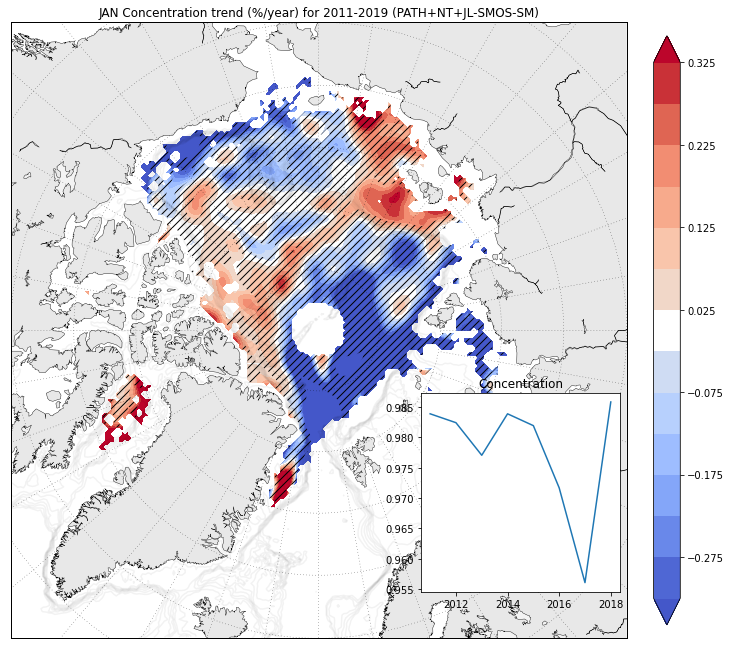

In [430]:
biasContDist=0.05
rgrColorTable=np.array(['#4457c9','#4f67d4','#6988ea','#84a6f9','#9ebdff','#b7d0fd','#cfdcf3','#ffffff','#f1d7c8','#f9c5ab','#f7aa8c','#f28d72','#df6553','#c93137','#bc052b'])
iContNr=len(rgrColorTable)
iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-iMinMax,iMinMax+0.0001,biasContDist)
print(-iMinMax,iMinMax+0.0001,biasContDist)

plt.figure(figsize=(12,12))    
year_str = '%02d' % (year+2010)
#     month_str = '%02d' % (month+1)
# budget[NSIDC_Osisaf_nn!=15]=np.nan
m = Basemap(projection='npstere',boundinglat=65,lon_0=0, resolution='l')
m.drawcoastlines(linewidth=0.4)
m.fillcontinents(color='lightgray',lake_color='white', alpha=0.5)
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(60,90,5),linewidth=0.5, dashes=[1,5])
m.drawmeridians(np.arange(0,360,10),linewidth=0.5, dashes=[1,5])
llevels1 = np.arange(-2000,0,250) # check etopo.ravel().max()
x, y = m(lon, lat)
s = m.contour(x, y, -depth_Pathfinder_nn, vmin=-8000, vmax=0,levels=llevels1,colors='k', linestyles='-',alpha=0.05)
llevels2 = np.arange(2,3,1) # check etopo.ravel().max()
#     if lon.shape[0]==361:
#         xtest, ytest = m(lon_Osisaf, lat_Osisaf)
#         icetype2=griddata((xtest.ravel(), ytest.ravel()),icetype.ravel(), (x, y), method='nearest')
# #         s = m.contour(x, y, icetype2, vmin=2, vmax=3,levels=llevels2,colors='r', linestyles='-',alpha=0.3)

my_cmap=plt.cm.RdYlBu
#my_cmap=plt.cm.bwr_r
#     llevels = llevels

#     cs = m.contour(x, y, plot2, hatches=['','///'],levels=[0,90,100], zorder=1, alpha=0)
#     m.contourf(x, y, plot2, levels=levels, hatches=["", "."], alpha=0)

#     s = m.contourf(x, y, plot, vmin=vmin, vmax=vmax,levels=llevels,cmap=my_cmap, extend='both',alpha=1.) 
s = m.contourf(x, y, trend_ym[0], colors=rgrColorTable, extend='both',levels=clevsTD)#, zorder=0)
#     levels = [plot2.min(), 20, plot2.max()]
#     m.contourf(x, y, plot2, levels=levels, hatches=["", "."], alpha=0)
m.contourf(x, y, sig_a_ym[0],levels=[0,80,100], hatches=['///',''],alpha=0)


#     plt.title(title+', year='+year_str,fontsize=20)
plt.title('JAN Concentration trend (%/year) for 2011-2019 ('+list_names[index]+')')


plt.colorbar(s,fraction=0.04, pad=0.04)

# # inset = inset_axes(0.705, 0.44, 0.14, 0.14)
# # inset = inset_axes(s, "30%", "40%", loc="lower right")

# x1 = np.linspace(2010,2020,11)
# index=5
# field=variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var]
# y1=np.nanmean(field,(2,3))
# # field_avg.shape
# inset.plot(x1,field_avg[:,11],label=list_names[index])

# # inset.set_title('E. Siberian')

# inset.plot(x1,y1)


# reg = linregress(x1,y1)    



# inset.plot([np.min(x),np.max(x)],
#      [np.min(x)*reg[0]+reg[1],
#       np.max(x)*reg[0]+reg[1] ],
#       color='k',ls='--')


# inset.annotate(xy=(0.99,0.02),ha='right',
#        text=f'{np.round(reg[0],decimals=2)}',
#        xycoords='axes fraction',
#        fontsize='x-large')


# inset.set_yticklabels([])
# inset.set_xticklabels([])



# this is an inset axes over the main axes
a = plt.axes([0.6, 0.2, 0.23, 0.23])#, facecolor='y')
# n, bins, patches = plt.hist(s, 400, normed=1)
x1 = np.linspace(2010,2020,11)
index=5
field=variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var]
y1=np.nanmean(field,(2,3))[:,0]
# reg = linregress(x1,y1)    


# field_avg.shape
plt.plot(x1,y1,label=list_names[index])
# plt.plot([np.min(x1),np.max(x1)],
#      [np.min(x1)*reg[0]+reg[1],
#       np.max(x1)*reg[0]+reg[1] ],
#       color='k',ls='--')

# inset.annotate(xy=(0.99,0.02),ha='right',
#        text=f'{np.round(reg[0],decimals=2)}',
#        xycoords='axes fraction',
#        fontsize='x-large')


plt.title('Concentration')
# plt.xticks([])
# plt.yticks([])



-10.400000000000002 10.400100000000002 1.6


/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


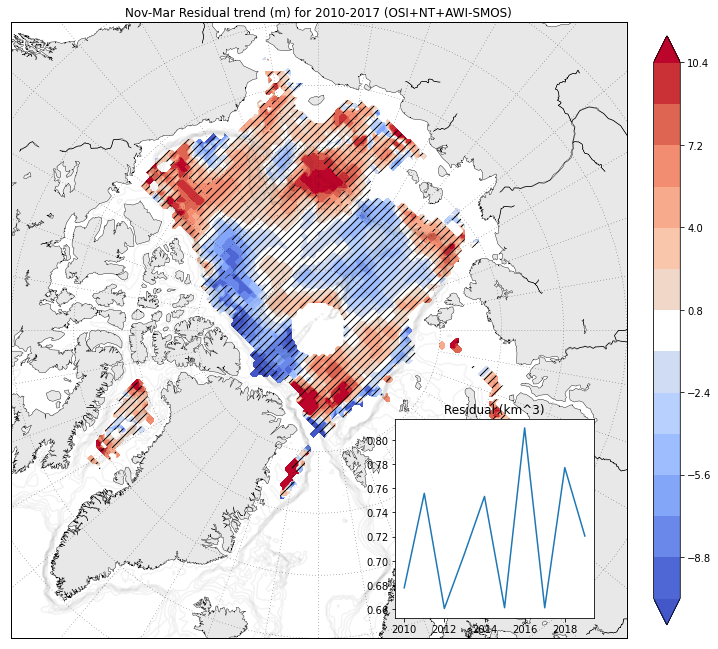

In [616]:
biasContDist=1.6
rgrColorTable=np.array(['#4457c9','#4f67d4','#6988ea','#84a6f9','#9ebdff','#b7d0fd','#cfdcf3','#ffffff','#f1d7c8','#f9c5ab','#f7aa8c','#f28d72','#df6553','#c93137','#bc052b'])
iContNr=len(rgrColorTable)
iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-iMinMax,iMinMax+0.0001,biasContDist)
print(-iMinMax,iMinMax+0.0001,biasContDist)

plt.figure(figsize=(12,12))    
year_str = '%02d' % (year+2010)
#     month_str = '%02d' % (month+1)
# budget[NSIDC_Osisaf_nn!=15]=np.nan
m = Basemap(projection='npstere',boundinglat=65,lon_0=0, resolution='l')
m.drawcoastlines(linewidth=0.4)
m.fillcontinents(color='lightgray',lake_color='white', alpha=0.5)
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(60,90,5),linewidth=0.5, dashes=[1,5])
m.drawmeridians(np.arange(0,360,10),linewidth=0.5, dashes=[1,5])
llevels1 = np.arange(-2000,0,250) # check etopo.ravel().max()
x, y = m(lon, lat)
s = m.contour(x, y, -depth_Pathfinder_nn, vmin=-8000, vmax=0,levels=llevels1,colors='k', linestyles='-',alpha=0.05)
llevels2 = np.arange(2,3,1) # check etopo.ravel().max()
#     if lon.shape[0]==361:
#         xtest, ytest = m(lon_Osisaf, lat_Osisaf)
#         icetype2=griddata((xtest.ravel(), ytest.ravel()),icetype.ravel(), (x, y), method='nearest')
# #         s = m.contour(x, y, icetype2, vmin=2, vmax=3,levels=llevels2,colors='r', linestyles='-',alpha=0.3)

my_cmap=plt.cm.RdYlBu
#my_cmap=plt.cm.bwr_r
#     llevels = llevels

#     cs = m.contour(x, y, plot2, hatches=['','///'],levels=[0,90,100], zorder=1, alpha=0)
#     m.contourf(x, y, plot2, levels=levels, hatches=["", "."], alpha=0)

#     s = m.contourf(x, y, plot, vmin=vmin, vmax=vmax,levels=llevels,cmap=my_cmap, extend='both',alpha=1.) 

var=3
index=9

s = m.contourf(x, y, trends_dictionnary[var][index]['2010/2017 trend'], colors=rgrColorTable, extend='both',levels=clevsTD)#, zorder=0)
#     levels = [plot2.min(), 20, plot2.max()]
#     m.contourf(x, y, plot2, levels=levels, hatches=["", "."], alpha=0)
m.contourf(x, y, trends_dictionnary[var][index]['2010/2017 sig_a'],levels=[0,90,100], hatches=['///',''],alpha=0)


#     plt.title(title+', year='+year_str,fontsize=20)
plt.title('Nov-Mar Residual trend (m) for 2010-2017 ('+list_names[index]+')')


plt.colorbar(s,fraction=0.04, pad=0.04)


# this is an inset axes over the main axes
a = plt.axes([0.57, 0.17, 0.23, 0.23])#, facecolor='y')
# n, bins, patches = plt.hist(s, 400, normed=1)
x1 = np.linspace(2010,2020,11)
field=86400*growth_nov_mar[index,var]*area_array0/1e9
y1=np.nanmean(field,(1,2))#[:,0]
# reg = linregress(x1,y1)    


# field_avg.shape
plt.plot(x1,y1,label=list_names[index])

plt.title('Residual (km^3)')
# plt.xticks([])
# plt.yticks([])


plt.savefig('/Users/micheltsamados/Desktop/NovMarResTrendIndex9.png', dpi=400)



-10.400000000000002 10.400100000000002 1.6


/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/matplotlib/contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/matplotlib/contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


Text(0.5, 1.0, 'Residual (km^3)')

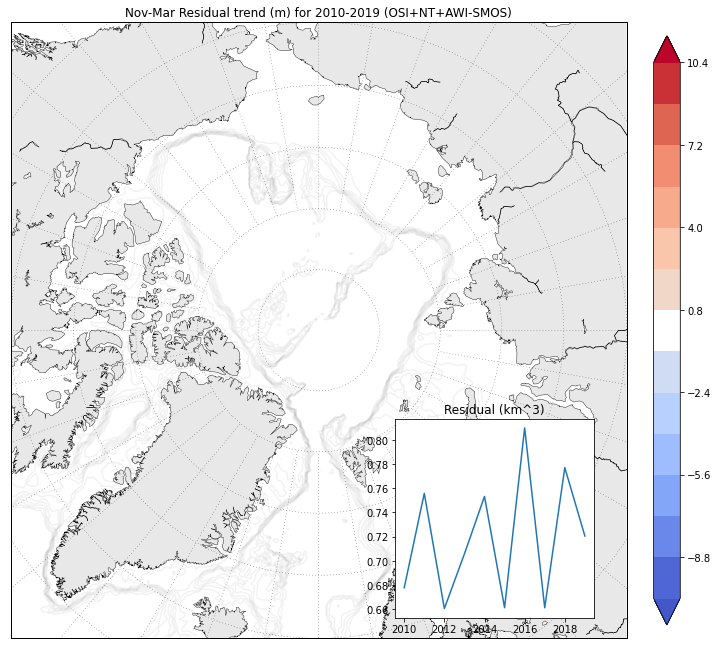

In [613]:
biasContDist=1.6
rgrColorTable=np.array(['#4457c9','#4f67d4','#6988ea','#84a6f9','#9ebdff','#b7d0fd','#cfdcf3','#ffffff','#f1d7c8','#f9c5ab','#f7aa8c','#f28d72','#df6553','#c93137','#bc052b'])
iContNr=len(rgrColorTable)
iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-iMinMax,iMinMax+0.0001,biasContDist)
print(-iMinMax,iMinMax+0.0001,biasContDist)

plt.figure(figsize=(12,12))    
year_str = '%02d' % (year+2010)
#     month_str = '%02d' % (month+1)
# budget[NSIDC_Osisaf_nn!=15]=np.nan
m = Basemap(projection='npstere',boundinglat=65,lon_0=0, resolution='l')
m.drawcoastlines(linewidth=0.4)
m.fillcontinents(color='lightgray',lake_color='white', alpha=0.5)
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(60,90,5),linewidth=0.5, dashes=[1,5])
m.drawmeridians(np.arange(0,360,10),linewidth=0.5, dashes=[1,5])
llevels1 = np.arange(-2000,0,250) # check etopo.ravel().max()
x, y = m(lon, lat)
s = m.contour(x, y, -depth_Pathfinder_nn, vmin=-8000, vmax=0,levels=llevels1,colors='k', linestyles='-',alpha=0.05)
llevels2 = np.arange(2,3,1) # check etopo.ravel().max()
#     if lon.shape[0]==361:
#         xtest, ytest = m(lon_Osisaf, lat_Osisaf)
#         icetype2=griddata((xtest.ravel(), ytest.ravel()),icetype.ravel(), (x, y), method='nearest')
# #         s = m.contour(x, y, icetype2, vmin=2, vmax=3,levels=llevels2,colors='r', linestyles='-',alpha=0.3)

my_cmap=plt.cm.RdYlBu
#my_cmap=plt.cm.bwr_r
#     llevels = llevels

#     cs = m.contour(x, y, plot2, hatches=['','///'],levels=[0,90,100], zorder=1, alpha=0)
#     m.contourf(x, y, plot2, levels=levels, hatches=["", "."], alpha=0)

#     s = m.contourf(x, y, plot, vmin=vmin, vmax=vmax,levels=llevels,cmap=my_cmap, extend='both',alpha=1.) 
s = m.contourf(x, y, trend, colors=rgrColorTable, extend='both',levels=clevsTD)#, zorder=0)
#     levels = [plot2.min(), 20, plot2.max()]
#     m.contourf(x, y, plot2, levels=levels, hatches=["", "."], alpha=0)
m.contourf(x, y, sig_a,levels=[0,90,100], hatches=['///',''],alpha=0)


#     plt.title(title+', year='+year_str,fontsize=20)
plt.title('Nov-Mar Residual trend (m) for 2010-2019 ('+list_names[index]+')')


plt.colorbar(s,fraction=0.04, pad=0.04)

# # inset = inset_axes(0.705, 0.44, 0.14, 0.14)
# # inset = inset_axes(s, "30%", "40%", loc="lower right")

# x1 = np.linspace(2010,2020,11)
# index=5
# field=variables_all_new_same_grid_array_pathfinder_compact_array_model_mask2_float16[index,var]
# y1=np.nanmean(field,(2,3))
# # field_avg.shape
# inset.plot(x1,field_avg[:,11],label=list_names[index])

# # inset.set_title('E. Siberian')

# inset.plot(x1,y1)


# reg = linregress(x1,y1)    



# inset.plot([np.min(x),np.max(x)],
#      [np.min(x)*reg[0]+reg[1],
#       np.max(x)*reg[0]+reg[1] ],
#       color='k',ls='--')


# inset.annotate(xy=(0.99,0.02),ha='right',
#        text=f'{np.round(reg[0],decimals=2)}',
#        xycoords='axes fraction',
#        fontsize='x-large')


# inset.set_yticklabels([])
# inset.set_xticklabels([])



# this is an inset axes over the main axes
a = plt.axes([0.57, 0.17, 0.23, 0.23])#, facecolor='y')
# n, bins, patches = plt.hist(s, 400, normed=1)
x1 = np.linspace(2010,2020,11)
var=3
index=9
field=86400*growth_nov_mar[index,var]*area_array0/1e9
y1=np.nanmean(field,(1,2))#[:,0]
# reg = linregress(x1,y1)    


# field_avg.shape
plt.plot(x1,y1,label=list_names[index])
# plt.plot([np.min(x1),np.max(x1)],
#      [np.min(x1)*reg[0]+reg[1],
#       np.max(x1)*reg[0]+reg[1] ],
#       color='k',ls='--')

# inset.annotate(xy=(0.99,0.02),ha='right',
#        text=f'{np.round(reg[0],decimals=2)}',
#        xycoords='axes fraction',
#        fontsize='x-large')


plt.title('Residual (km^3)')
# plt.xticks([])
# plt.yticks([])





In [614]:
growth_nov_mar.shape

(21, 10, 11, 361, 361)

(array([1.30319e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([   23512.78160742,  2019036.67583991,  4014560.5700724 ,
         6010084.46430489,  8005608.35853738, 10001132.25276987,
        11996656.14700236, 13992180.04123485, 15987703.93546734,
        17983227.82969983, 19978751.72393232]),
 <a list of 10 Patch objects>)

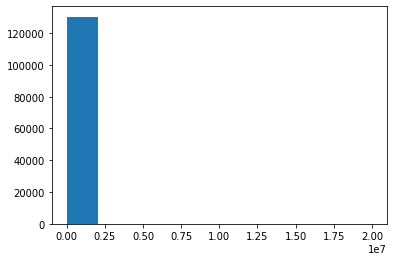

In [618]:
plt.hist(GV0.xdist.ravel())

In [619]:
GV0.xdist.ravel()

array([25541.91425863, 25555.19682785, 25568.98904008, ...,
       25568.98904008, 25554.99896419, 25541.51685148])

In [457]:
np.nanmean(field,(1,2))[:].shape

(11,)

In [ ]:
# Import mask data from netcdf

mask_dir = '/home/robbie/Dropbox/Code/mask.nc'
mask_data = mask.get('mask')

lon, lat =np.array(mask.get('lon')), np.array(mask.get('lat'))
my_mask = np.array(mask.get('mask'))

###################################################################

# Define what the colours should be and where the annotations should go


Regions = {
            "Kara":('Oranges',(0.705,0.44)),
            "Laptev":('Blues',(0.65,0.63)),
            "East Siberian":('Greens',(0.58,0.78)),
            "Chukchi":('Reds',(0.353,0.82)),
            "Beaufort":('pink',(0.23,0.72)),
            "Baffin":('Purples',(0.385,0.58)),
            "Hudson":('Set2',(0.63,0.25)),
            "Okhotsk":('Set1',(0.63,0.25)),
            "Bering":('Set3',(0.63,0.25)),
          }

###################################################################

# Make the plot

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())


coords_list = [
                (0.675,0.15), #Kara
                (0.845,0.42), #Laptev
                (0.69,0.615), #East Siberian
                (0.43,0.36), #Chukchi
                (0.025+0.175,0.7), #Beaufort
                (0.1,0.05), #Baffin
                (0.025,0.58), #Hudson
                (0.845,0.7), #Okhotsk
                (0.025,0.8), #Bering
                ]


for region, coords in zip(Regions.keys(), coords_list):
    
    region_mask = np.ones((361,361))
    region_mask[my_mask != region_codes[region]] = np.nan
    if region == 'Baffin': region_mask[lat < 60] = np.nan

    ax.pcolormesh(lon, lat, region_mask[:-1,:-1], cmap=Regions[region][0], vmin=0, vmax = 3, transform=ccrs.PlateCarree())


    
    if region!='East Siberian':
        inset = ax.inset_axes([coords[0], coords[1],
                               0.15, 0.15])
        x,y = answer_dict[region]
        inset.set_title(region)
        
    else:
        inset = ax.inset_axes([coords[0], coords[1],
                               0.14, 0.14])
        x,y = answer_dict['East-Siberian']
        inset.set_title('E. Siberian')
        
    inset.plot(x,y)
        

    reg = linregress(x,y)    
    

    
    inset.plot([np.min(x),np.max(x)],
             [np.min(x)*reg[0]+reg[1],
              np.max(x)*reg[0]+reg[1] ],
              color='k',ls='--')
    
        
    inset.annotate(xy=(0.99,0.02),ha='right',
               text=f'{np.round(reg[0],decimals=2)}',
               xycoords='axes fraction',
               fontsize='x-large')
    
    
    inset.set_yticklabels([])
    inset.set_xticklabels([])
  
                     
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),
               alpha=0.5,
               edgecolor='black',zorder=1)

ax.set_extent([-180, 180, 90, 50], ccrs.PlateCarree())

    
data_dir = '/home/robbie/Dropbox/Apps/Overleaf/Book_chapter/figs'

plt.savefig(f"{data_dir}/fig_7_c.png",dpi=500, bbox_inches='tight')

plt.show()


-0.065 0.0651 0.01


/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]


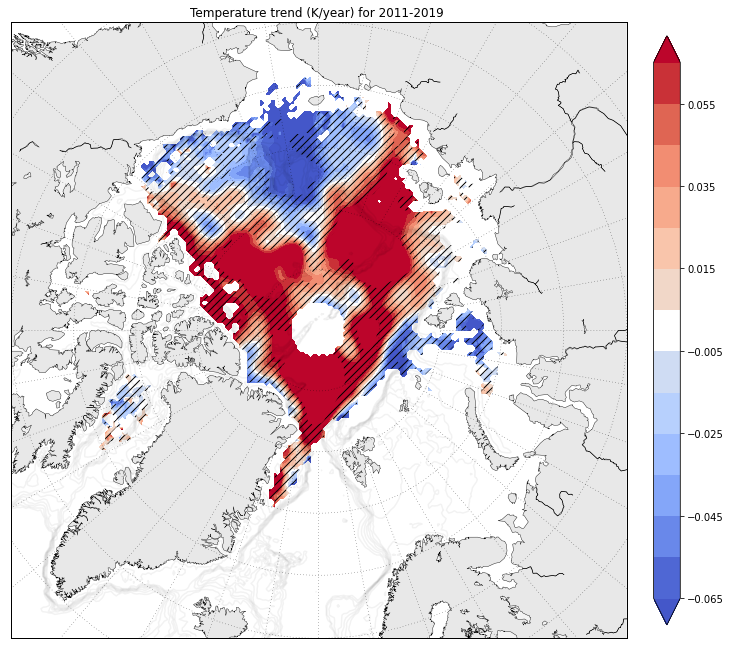

In [346]:

Plot_variable_ice_type_special(year,var,r,index,trend_ym[0],sig_a_ym[0],llevels,vmin,vmax,lon,lat,depth_Pathfinder_nn,title='var'+str(var)+' for '+sea_names[r], filename='index'+str(0)+'_var'+str(var)+'_r'+str(16)+'_year'+str(year)+'_nomask')




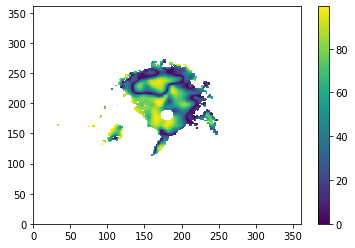

In [322]:
plt.pcolor(sig_a_ym[0].T)
plt.colorbar()

-0.065 0.0651 0.01


/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.


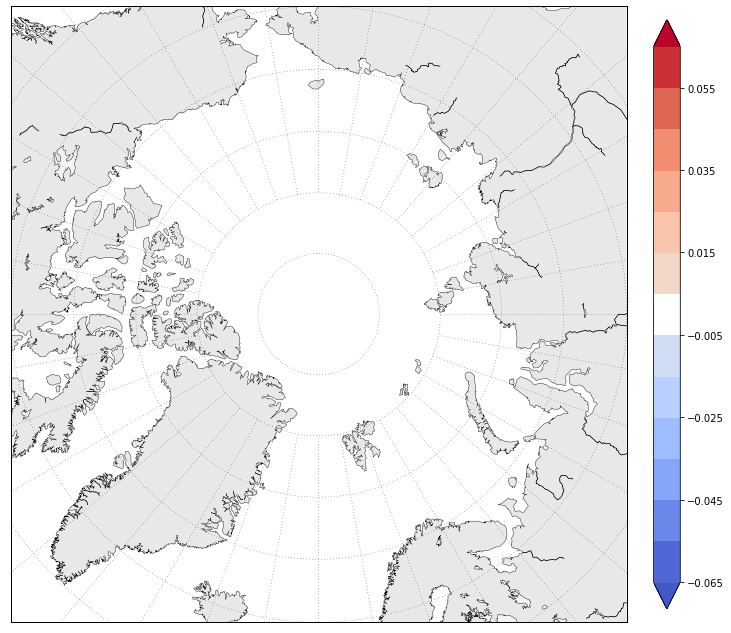

In [321]:
plt.figure(figsize=(12,12))    
biasContDist=0.01
rgrColorTable=np.array(['#4457c9','#4f67d4','#6988ea','#84a6f9','#9ebdff','#b7d0fd','#cfdcf3','#ffffff','#f1d7c8','#f9c5ab','#f7aa8c','#f28d72','#df6553','#c93137','#bc052b'])
iContNr=len(rgrColorTable)
iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-iMinMax,iMinMax+0.0001,biasContDist)
print(-iMinMax,iMinMax+0.0001,biasContDist)


m = Basemap(projection='npstere',boundinglat=65,lon_0=0, resolution='l')
m.drawcoastlines(linewidth=0.4)
m.fillcontinents(color='lightgray',lake_color='white', alpha=0.5)
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(60,90,5),linewidth=0.5, dashes=[1,5])
m.drawmeridians(np.arange(0,360,10),linewidth=0.5, dashes=[1,5])
x,y=m(lon_Pathfinder,lat_Pathfinder)
# plt.contourf(x, y, trend_ym[0])
s = m.contour(x, y, sig_a_ym[0],hatches=['','///'],levels=[0,90,100], zorder=1, alpha=0)
s = m.contourf(x, y, trend_ym[0], colors=rgrColorTable, extend='both',levels=clevsTD, zorder=0)


# s = m.contourf(x, y, budget, vmin=vmin, vmax=vmax,levels=llevels,cmap=my_cmap, extend='both',alpha=1.) 


# plt.title(title+', year='+year_str,fontsize=20)
plt.colorbar(s,fraction=0.04, pad=0.04)


# plt.colorbar()

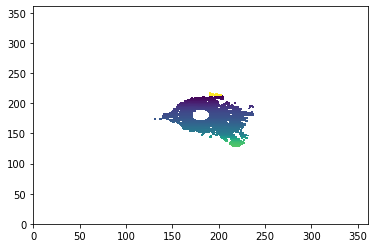

In [107]:
plt.pcolor(trend)

### Auxiliary data

In [24]:
#TOPAZ/TOPAZ_v4/topaz_V4_myocean_arctic_grid1to8_da_class1_19990915.nc  
# filepath='/Users/micheltsamados/Google Drive/PAPER_NOEL/TOPAZ_v4/'
# filepath='/Users/micheltsamados/Google Drive/PAPER_NOEL/'
filepath='/Users/micheltsamados/Dropbox/ThomasJohnson/MISR_bathymetry/'
#data1=Dataset(filepath+'topaz_V4_myocean_arctic_grid1to8_da_class1_19990915.nc',"r")    
data1=Dataset(filepath+'topaz_V4_myocean_arctic_grid1to8_da_class1_19910115.nc',"r") 
lon_TOPAZ=data1.variables['longitude'][:,:]
lat_TOPAZ=data1.variables['latitude'][:,:]
depth=data1.variables['model_depth'][:,:]


#np.save('lon_TOPAZ.npy',np.asarray(lon_TOPAZ))
#np.save('lat_TOPAZ.npy',np.asarray(lat_TOPAZ))
#np.save('depth.npy',np.asarray(depth))

25188.41022683296 25188.410056759105
692.8480607449123 692.8481664297606


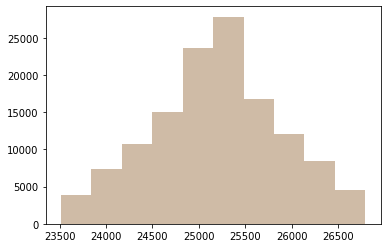

In [640]:
plt.hist(GV0.xdist.ravel()[GV0.xdist.ravel()<2e6],alpha=0.3)
plt.hist(GV0.ydist.ravel()[GV0.ydist.ravel()<2e6],alpha=0.3)
print(np.mean(GV0.xdist.ravel()[GV0.xdist.ravel()<2e6]),np.mean(GV0.ydist.ravel()[GV0.ydist.ravel()<2e6]))
print(np.std(GV0.xdist.ravel()[GV0.xdist.ravel()<2e6]),np.std(GV0.ydist.ravel()[GV0.ydist.ravel()<2e6]))

58968.778554896075 58963.13280867923
3447.539460765796 3455.5727669965127


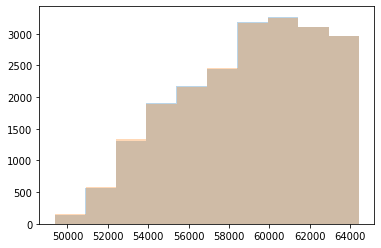

In [639]:
plt.hist(GV1.xdist.ravel()[GV1.xdist.ravel()<2e6],alpha=0.3)
plt.hist(GV1.ydist.ravel()[GV1.ydist.ravel()<2e6],alpha=0.3)
print(np.mean(GV1.xdist.ravel()[GV1.xdist.ravel()<2e6]),np.mean(GV1.ydist.ravel()[GV1.ydist.ravel()<2e6]))
print(np.std(GV1.xdist.ravel()[GV1.xdist.ravel()<2e6]),np.std(GV1.ydist.ravel()[GV1.ydist.ravel()<2e6]))

57308.229674034505 57308.229674034505
2704.985111026871 2704.9851110268705


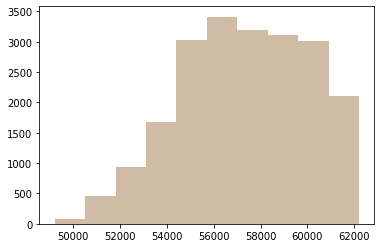

In [642]:
plt.hist(GV2.xdist.ravel()[GV2.xdist.ravel()<2e6],alpha=0.3)
plt.hist(GV2.ydist.ravel()[GV2.ydist.ravel()<2e6],alpha=0.3)
print(np.mean(GV2.xdist.ravel()[GV2.xdist.ravel()<2e6]),np.mean(GV2.ydist.ravel()[GV2.ydist.ravel()<2e6]))
print(np.std(GV2.xdist.ravel()[GV2.xdist.ravel()<2e6]),np.std(GV2.ydist.ravel()[GV2.ydist.ravel()<2e6]))

37511.22202747267 35408.448219844744
18124.66340835199 13312.342538309169


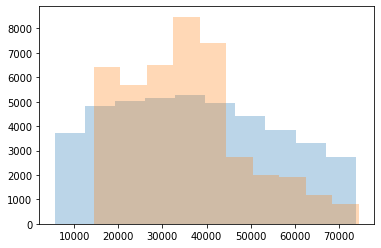

In [643]:
plt.hist(GV3.xdist.ravel()[GV3.xdist.ravel()<2e6],alpha=0.3)
plt.hist(GV3.ydist.ravel()[GV3.ydist.ravel()<2e6],alpha=0.3)
print(np.mean(GV3.xdist.ravel()[GV3.xdist.ravel()<2e6]),np.mean(GV3.ydist.ravel()[GV3.ydist.ravel()<2e6]))
print(np.std(GV3.xdist.ravel()[GV3.xdist.ravel()<2e6]),np.std(GV3.ydist.ravel()[GV3.ydist.ravel()<2e6]))

54032.89222483663 54515.64541495385
9692.910104954992 9351.864058199568


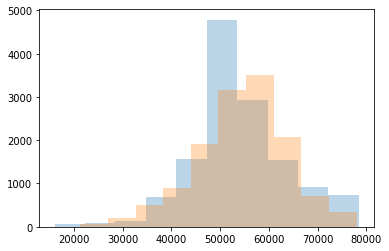

In [644]:
plt.hist(GV4.xdist.ravel()[GV4.xdist.ravel()<2e6],alpha=0.3)
plt.hist(GV4.ydist.ravel()[GV4.ydist.ravel()<2e6],alpha=0.3)
print(np.mean(GV4.xdist.ravel()[GV4.xdist.ravel()<2e6]),np.mean(GV4.ydist.ravel()[GV4.ydist.ravel()<2e6]))
print(np.std(GV4.xdist.ravel()[GV4.xdist.ravel()<2e6]),np.std(GV4.ydist.ravel()[GV4.ydist.ravel()<2e6]))

In [29]:
m = Basemap(projection='stere', 
            lon_0=-45.0, lat_0=83, lat_ts=0, 
            height = 3335000*1.8, width = 3335000*1.8)

### VELOCITY
GV0 = gs.grid_set(m)
GV1 = gs.grid_set(m)
GV2 = gs.grid_set(m)
GV3 = gs.grid_set(m)
GV4 = gs.grid_set(m)



GV0.load_grid('../../grids/Pathfinder_gs.npz')
GV0.load_mask('../../grids/Pathfinder_gs_mask.npz')
GV1.load_grid('../../grids/osisaf_gs.npz')
GV1.load_mask('../../grids/osisaf_gs_mask2.npz')
GV2.load_grid('../../grids/Kimura_gs.npz')
GV2.load_mask('../../grids/Kimura_gs_mask.npz')
GV3.load_grid('../../grids/PIOMAS_gs.npz')
GV3.load_mask('../../grids/PIOMAS_gs_mask.npz')
GV4.load_grid('../../grids/CICE_1deg_gsT.npz')
GV4.load_mask('../../grids/CICE_1deg_gs_maskT.npz')

# GV.load_grid('grids/PIOMAS_gs.npz')
# GV.load_mask('grids/PIOMAS_gs_mask.npz')
# GV0.load_grid('/Users/micheltsamados/Dropbox/OliverRacher copy/PAPER/BUDGET_AWI_NT_Kimura/Harry/Budget_tool-main/grids/Pathfinder_gs.npz')
# GV0.load_mask('/Users/micheltsamados/Dropbox/OliverRacher copy/PAPER/BUDGET_AWI_NT_Kimura/Harry/Budget_tool-main/grids/Pathfinder_gs_mask.npz')
# GV2.load_grid('/Users/micheltsamados/Dropbox/OliverRacher copy/PAPER/BUDGET_AWI_NT_Kimura/Harry/Budget_tool-main/grids/Kimura_gs.npz')
# GV2.load_mask('/Users/micheltsamados/Dropbox/OliverRacher copy/PAPER/BUDGET_AWI_NT_Kimura/Harry/Budget_tool-main/grids/Kimura_gs_mask.npz')
# GV1.load_grid('/Users/micheltsamados/Dropbox/OliverRacher copy/PAPER/BUDGET_AWI_NT_Kimura/Harry/Budget_tool-main/grids/osisaf_gs.npz')
# GV1.load_mask('/Users/micheltsamados/Dropbox/OliverRacher copy/PAPER/BUDGET_AWI_NT_Kimura/Harry/Budget_tool-main/grids/osisaf_gs_mask2.npz')
# GV3.load_grid('/Users/micheltsamados/Dropbox/OliverRacher copy/PAPER/BUDGET_AWI_NT_Kimura/Harry/Budget_tool-main/grids/PIOMAS_gs.npz')
# GV3.load_mask('/Users/micheltsamados/Dropbox/OliverRacher copy/PAPER/BUDGET_AWI_NT_Kimura/Harry/Budget_tool-main/grids/PIOMAS_gs_mask.npz')
# GV4.load_grid('/Users/micheltsamados/Dropbox/OliverRacher copy/PAPER/BUDGET_AWI_NT_Kimura/Harry/Budget_tool-main/grids/CICE_1deg_gsT.npz')
# GV4.load_mask('/Users/micheltsamados/Dropbox/OliverRacher copy/PAPER/BUDGET_AWI_NT_Kimura/Harry/Budget_tool-main/grids/CICE_1deg_gs_maskT.npz')
              

Loaded a grid: ../../grids/Pathfinder_gs.npz
Loaded mask,  361  x  361  inflated by  0.0
Loaded a grid: ../../grids/osisaf_gs.npz
Loaded mask,  119  x  177  inflated by  0.0
Loaded a grid: ../../grids/Kimura_gs.npz
Loaded mask,  145  x  145  inflated by  0.0
Loaded a grid: ../../grids/PIOMAS_gs.npz
Loaded mask,  360  x  120  inflated by  0.0
Loaded a grid: ../../grids/CICE_1deg_gsT.npz
Loaded mask,  104  x  129  inflated by  0.0


/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
area_array0=GV0.xdist*GV0.ydist
area_array0[area_array0>1e9]=np.nan
area_array1=GV1.xdist*GV1.ydist
area_array1[area_array1>1e10]=np.nan
area_array2=GV2.xdist*GV2.ydist
area_array3=GV3.xdist*GV3.ydist
area_array4=GV4.xdist*GV4.ydist

In [31]:
# plt.pcolor(area_array0[170:190,170:190])

In [32]:
area_array0.shape

(361, 361)

In [35]:
#Read lon lat for all velocity grids
v='Pathfinder'
c='nt'
t='AWI_SMOS'
files = glob.glob('../../../Step5/Budget_out_2020_09_23/out_'+v+'_'+c+'_'+t+'/budfields_201401'+'*.nc')
print(files)
lon_Pathfinder=Dataset(files[0],"r")['lon'][0]
lat_Pathfinder=Dataset(files[0],"r")['lat'][0]


v='OSISAF'
c='nt'
t='AWI_SMOS'
files = glob.glob('../../../Step5/Budget_out_2020_09_23/out_'+v+'_'+c+'_'+t+'/budfields_201401'+'*.nc')
print(files)
lon_Osisaf=Dataset(files[0],"r")['lon'][0]
lat_Osisaf=Dataset(files[0],"r")['lat'][0]


v='Kimura'
c='nt'
t='CPOM'
files = glob.glob('../../../Step5/Budget_out_2020_09_23/out_'+v+'_'+c+'_'+t+'/budfields_201401'+'*.nc')
print(files)
lon_Kimura=Dataset(files[0],"r")['lon'][0]
lat_Kimura=Dataset(files[0],"r")['lat'][0]


files = glob.glob('../../../Step5/Budget_out_2020_09_23/out_PIOMAS_Vsmooth_1980/budfields_201401'+'*.nc')
print(files)
lon_PIOMAS=Dataset(files[0],"r")['lon'][0]
lat_PIOMAS=Dataset(files[0],"r")['lat'][0]


files = glob.glob('../../../Step5/Budget_out_2020_09_23/CICE_r1155_free_Vsmooth/budfields_201401'+'*.nc')
print(files)
lon_CICE=Dataset(files[0],"r")['lon'][0]
lat_CICE=Dataset(files[0],"r")['lat'][0]



files = glob.glob('../../../Step5/Budget_out_2020_09_23/out_Pathfinder_nt_CCI_CS2/budfields_201401'+'*.nc')
print(files)
lon_CCI_CS2=Dataset(files[0],"r")['lon'][0]
lat_CCI_CS2=Dataset(files[0],"r")['lat'][0]


files = glob.glob('../../../Step5/Budget_out_2020_09_23/out_Pathfinder_nt_CCI_Envi/budfields_201001'+'*.nc')
print(files)
lon_CCI_Envi=Dataset(files[0],"r")['lon'][0]
lat_CCI_Envi=Dataset(files[0],"r")['lat'][0]

['../../../Step5/Budget_out_2020_09_23/out_Pathfinder_nt_AWI_SMOS/budfields_20140101.nc']
['../../../Step5/Budget_out_2020_09_23/out_OSISAF_nt_AWI_SMOS/budfields_20140101.nc']
['../../../Step5/Budget_out_2020_09_23/out_Kimura_nt_CPOM/budfields_20140101.nc']
['../../../Step5/Budget_out_2020_09_23/out_PIOMAS_Vsmooth_1980/budfields_20140101.nc']
['../../../Step5/Budget_out_2020_09_23/CICE_r1155_free_Vsmooth/budfields_20140101.nc']
['../../../Step5/Budget_out_2020_09_23/out_Pathfinder_nt_CCI_CS2/budfields_20140101.nc']
['../../../Step5/Budget_out_2020_09_23/out_Pathfinder_nt_CCI_Envi/budfields_20100101.nc']


/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.


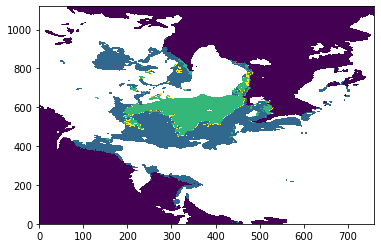

In [38]:
m = Basemap(projection='npstere',boundinglat=65,lon_0=0, resolution='l')

filepath_icetype='/Users/micheltsamados/Dropbox/OliverRacher copy/Data/IceType/'
file_icetype=filepath_icetype+'ice_type_nh_polstere-100_multi_201001151200.nc'
data=Dataset(file_icetype,"r")
    
lon_icetype=data['lon']
lat_icetype=data['lat']
xtest, ytest = m(lon_icetype[:,:], lat_icetype[:,:])  
plt.pcolor(data['ice_type'][0])

In [39]:
#Read Ice Type #1 ocean #2 FYI #MYI
 
#ftp://osisaf.met.no/archive/ice/type/2015/08/

        
# m = Basemap(width=6000000,height=4000000,
#     rsphere=(6378137.00,6356752.3142),\
#     resolution='l',area_thresh=1000.,projection='lcc',\
#     lat_1=55.,lat_2=85,lat_0=80,lon_0=0.)
        
m = Basemap(projection='npstere',boundinglat=65,lon_0=0, resolution='l')

    
filepath_icetype='/Users/micheltsamados/Dropbox/OliverRacher copy/Data/IceType/'
file_icetype=filepath_icetype+'ice_type_nh_polstere-100_multi_201001151200.nc'
data=Dataset(file_icetype,"r")
    
lon_icetype=data['lon']
lat_icetype=data['lat']
xtest, ytest = m(lon_icetype[:,:], lat_icetype[:,:])   

x, y = m(lon_Osisaf, lat_Osisaf)



data_icetype=[]
filepath_icetype='/Users/micheltsamados/Dropbox/OliverRacher copy/Data/IceType/'
for year in range (2010,2021):
#     print(year_str1)
    for month in range(12):
        try:
            year_str1 = '%02d' % (year)
            month_str1 = '%02d' % (month+1)

    #        ice_type_nh_polstere-100_multi_201903151200.nc 
            file_icetype=filepath_icetype+'ice_type_nh_polstere-100_multi_'+year_str1+month_str1+'151200.nc'
            data=Dataset(file_icetype,"r")
    #         data_icetype.append(data['ice_type'])
            data_icetype.append(griddata((xtest.ravel(), ytest.ravel()),data['ice_type'][0].ravel(), (x, y), method='nearest'))
        except:
            print('nothing for',year,month)
            data_icetype.append(np.empty((119, 177)))
#     for month in [0,1,2,3]:
#         year_str1 = '%02d' % (year+1)
#         month_str1 = '%02d' % (month+1)
        
# #        ice_type_nh_polstere-100_multi_201903151200.nc 
#         file_icetype=filepath_icetype+'ice_type_nh_polstere-100_multi_'+year_str1+month_str1+'151200.nc'
#         data=Dataset(file_icetype,"r")
# #         data_icetype.append(data['ice_type'])
#         data_icetype.append(griddata((xtest.ravel(), ytest.ravel()),data['ice_type'][0].ravel(), (x, y), method='nearest'))

    
    




/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


nothing for 2010 0
nothing for 2010 1
nothing for 2010 2
nothing for 2010 3
nothing for 2010 4
nothing for 2010 5
nothing for 2010 6
nothing for 2010 7
nothing for 2010 8
nothing for 2010 9
nothing for 2010 10
nothing for 2010 11
nothing for 2011 0
nothing for 2011 1
nothing for 2011 2
nothing for 2011 3
nothing for 2011 4
nothing for 2011 5
nothing for 2011 6
nothing for 2011 7
nothing for 2011 8
nothing for 2011 9
nothing for 2011 10
nothing for 2011 11
nothing for 2012 0
nothing for 2012 1
nothing for 2012 2
nothing for 2012 3
nothing for 2012 4
nothing for 2012 5
nothing for 2012 6
nothing for 2012 7
nothing for 2012 8
nothing for 2012 9
nothing for 2012 10
nothing for 2012 11
nothing for 2013 0
nothing for 2013 1
nothing for 2013 2
nothing for 2013 3
nothing for 2013 4
nothing for 2013 5
nothing for 2013 6
nothing for 2013 7
nothing for 2013 8
nothing for 2013 9
nothing for 2013 10
nothing for 2013 11
nothing for 2014 0
nothing for 2014 1
nothing for 2014 2
nothing for 2014 3
noth

In [40]:

data_icetype_array=np.asarray(data_icetype).reshape((11,12,119,177)) #year, month 


In [41]:
#Read NSIDC mask 
# data_NSIDC=Dataset('NSIDC_Regions_Masks-2.nc',"r")
data_NSIDC=Dataset('../../NSIDC_Regions_Masks.nc',"r")
mask_NSIDC=data_NSIDC.variables['mask']
lon_NSIDC=data_NSIDC.variables['lon']
lat_NSIDC=data_NSIDC.variables['lat']
area_NSIDC=data_NSIDC.variables['area']

In [42]:
#https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii
AO_monthly=np.loadtxt('../../../Step5/AO_monthly/AO_monthly.txt')

In [43]:
AO_winter_oct_apr=np.zeros((71))
k=9

for year in range(1950,2021):
    y=year-1950

    for m in range(7):
        k=k+1
        print(k)
        AO_winter_oct_apr[y]=AO_winter_oct_apr[y]+AO_monthly[k,2]/3.
    for m in range(5):
        k=k+1
        print(k)
#         AO_seasonally[y,s]=AO_seasonally[y,s]+AO_monthly[k,2]/3.        

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
28

IndexError: index 854 is out of bounds for axis 0 with size 854

In [44]:
AO_winter=np.zeros((71))
k=10

for year in range(1950,2021):
    y=year-1950

    for m in range(5):
        k=k+1
        print(k)
        AO_winter[y]=AO_winter[y]+AO_monthly[k,2]/3.
    for m in range(7):
        k=k+1
        print(k)
#         AO_seasonally[y,s]=AO_seasonally[y,s]+AO_monthly[k,2]/3.        

11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
2

IndexError: index 854 is out of bounds for axis 0 with size 854

In [45]:
k=2
AO_seasonally=np.zeros((71,4))
for year in range(1950,2021):
    y=year-1950
    for s in range(4):
        for m in range(3):
            k=k+1
            print(k)
            AO_seasonally[y,s]=AO_seasonally[y,s]+AO_monthly[k,2]/3.

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278


IndexError: index 854 is out of bounds for axis 0 with size 854

In [62]:
#Interpolate on Osisaf grid 
#mapC = Basemap(projection='stere', lon_0=-45, lat_0=90, lat_ts=70, 
#        urcrnrlat=31.37 , urcrnrlon=102.34, llcrnrlat=33.92,  llcrnrlon=279.26)
m = Basemap(width=6000000,height=4000000,
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=55.,lat_2=85,lat_0=80,lon_0=0.)
xtest, ytest = m(lon_TOPAZ, lat_TOPAZ)
x, y = m(lon_Pathfinder, lat_Pathfinder)
#x, y = m(lon, lat)
depth_Pathfinder_nn=griddata((xtest.ravel(), ytest.ravel()),depth.ravel(), (x, y), method='nearest')

m = Basemap(width=6000000,height=4000000,
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=55.,lat_2=85,lat_0=80,lon_0=0.)
xtest, ytest = m(np.asarray(lon_NSIDC), np.asarray(lat_NSIDC))
x, y = m(lon_Pathfinder, lat_Pathfinder)
#x, y = m(lon, lat)
NSIDC_Pathfinder_nn=griddata((xtest.ravel(), ytest.ravel()),np.asarray(mask_NSIDC).ravel(), (x, y), method='nearest')




/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()


In [63]:
#Interpolate on Osisaf grid 
#mapC = Basemap(projection='stere', lon_0=-45, lat_0=90, lat_ts=70, 
#        urcrnrlat=31.37 , urcrnrlon=102.34, llcrnrlat=33.92,  llcrnrlon=279.26)
m = Basemap(width=6000000,height=4000000,
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=55.,lat_2=85,lat_0=80,lon_0=0.)
xtest, ytest = m(lon_TOPAZ, lat_TOPAZ)
x, y = m(lon_Osisaf, lat_Osisaf)
#x, y = m(lon, lat)
depth_Osisaf_nn=griddata((xtest.ravel(), ytest.ravel()),depth.ravel(), (x, y), method='nearest')

m = Basemap(width=6000000,height=4000000,
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=55.,lat_2=85,lat_0=80,lon_0=0.)
xtest, ytest = m(np.asarray(lon_NSIDC), np.asarray(lat_NSIDC))
x, y = m(lon_Osisaf, lat_Osisaf)
#x, y = m(lon, lat)
NSIDC_Osisaf_nn=griddata((xtest.ravel(), ytest.ravel()),np.asarray(mask_NSIDC).ravel(), (x, y), method='nearest')

/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()


/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


Loaded a grid: ../../grids/Pathfinder_gs.npz
Loaded mask,  361  x  361  inflated by  0.0
Loaded a grid: ../../grids/osisaf_gs.npz
Loaded mask,  119  x  177  inflated by  0.0
Loaded a grid: ../../grids/Kimura_gs.npz
Loaded mask,  145  x  145  inflated by  0.0
Loaded a grid: ../../grids/PIOMAS_gs.npz
Loaded mask,  360  x  120  inflated by  0.0
Loaded a grid: ../../grids/CICE_1deg_gsT.npz
Loaded mask,  104  x  129  inflated by  0.0
['../../../Step5/Budget_out_2020_09_23/out_Pathfinder_nt_AWI_SMOS/budfields_20140101.nc']
['../../../Step5/Budget_out_2020_09_23/out_OSISAF_nt_AWI_SMOS/budfields_20140101.nc']
['../../../Step5/Budget_out_2020_09_23/out_Kimura_nt_CPOM/budfields_20140101.nc']
['../../../Step5/Budget_out_2020_09_23/out_PIOMAS_Vsmooth_1980/budfields_20140101.nc']
['../../../Step5/Budget_out_2020_09_23/CICE_r1155_free_Vsmooth/budfields_20140101.nc']
['../../../Step5/Budget_out_2020_09_23/out_Pathfinder_nt_CCI_CS2/budfields_20140101.nc']
['../../../Step5/Budget_out_2020_09_23/out_Pat

/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:122: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:143: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


nothing for 2010 4
nothing for 2010 5
nothing for 2010 6
nothing for 2010 7
nothing for 2010 8
nothing for 2011 4
nothing for 2011 5
nothing for 2011 6
nothing for 2011 7
nothing for 2011 8
nothing for 2012 4
nothing for 2012 5
nothing for 2012 6
nothing for 2012 7
nothing for 2012 8
nothing for 2013 4
nothing for 2013 5
nothing for 2013 6
nothing for 2013 7
nothing for 2013 8
nothing for 2014 4
nothing for 2014 5
nothing for 2014 6
nothing for 2014 7
nothing for 2014 8
nothing for 2015 4
nothing for 2015 5
nothing for 2015 6
nothing for 2015 7
nothing for 2015 8
nothing for 2016 4
nothing for 2016 5
nothing for 2016 6
nothing for 2016 7
nothing for 2016 8
nothing for 2017 4
nothing for 2017 5
nothing for 2017 6
nothing for 2017 7
nothing for 2017 8
nothing for 2018 4
nothing for 2018 5
nothing for 2018 6
nothing for 2018 7
nothing for 2018 8
nothing for 2019 7


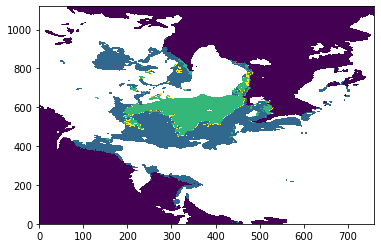

In [61]:
# Auxiliary data

#TOPAZ/TOPAZ_v4/topaz_V4_myocean_arctic_grid1to8_da_class1_19990915.nc  
# filepath='/Users/micheltsamados/Google Drive/PAPER_NOEL/TOPAZ_v4/'
# filepath='/Users/micheltsamados/Google Drive/PAPER_NOEL/'
filepath='/Users/micheltsamados/Dropbox/ThomasJohnson/MISR_bathymetry/'
#data1=Dataset(filepath+'topaz_V4_myocean_arctic_grid1to8_da_class1_19990915.nc',"r")    
data1=Dataset(filepath+'topaz_V4_myocean_arctic_grid1to8_da_class1_19910115.nc',"r") 
lon_TOPAZ=data1.variables['longitude'][:,:]
lat_TOPAZ=data1.variables['latitude'][:,:]
depth=data1.variables['model_depth'][:,:]


#np.save('lon_TOPAZ.npy',np.asarray(lon_TOPAZ))
#np.save('lat_TOPAZ.npy',np.asarray(lat_TOPAZ))
#np.save('depth.npy',np.asarray(depth))



m = Basemap(projection='stere', 
            lon_0=-45.0, lat_0=83, lat_ts=0, 
            height = 3335000*1.8, width = 3335000*1.8)

### VELOCITY
GV0 = gs.grid_set(m)
GV1 = gs.grid_set(m)
GV2 = gs.grid_set(m)
GV3 = gs.grid_set(m)
GV4 = gs.grid_set(m)



GV0.load_grid('../../grids/Pathfinder_gs.npz')
GV0.load_mask('../../grids/Pathfinder_gs_mask.npz')
GV1.load_grid('../../grids/osisaf_gs.npz')
GV1.load_mask('../../grids/osisaf_gs_mask2.npz')
GV2.load_grid('../../grids/Kimura_gs.npz')
GV2.load_mask('../../grids/Kimura_gs_mask.npz')
GV3.load_grid('../../grids/PIOMAS_gs.npz')
GV3.load_mask('../../grids/PIOMAS_gs_mask.npz')
GV4.load_grid('../../grids/CICE_1deg_gsT.npz')
GV4.load_mask('../../grids/CICE_1deg_gs_maskT.npz')

# GV.load_grid('grids/PIOMAS_gs.npz')
# GV.load_mask('grids/PIOMAS_gs_mask.npz')
# GV0.load_grid('/Users/micheltsamados/Dropbox/OliverRacher copy/PAPER/BUDGET_AWI_NT_Kimura/Harry/Budget_tool-main/grids/Pathfinder_gs.npz')
# GV0.load_mask('/Users/micheltsamados/Dropbox/OliverRacher copy/PAPER/BUDGET_AWI_NT_Kimura/Harry/Budget_tool-main/grids/Pathfinder_gs_mask.npz')
# GV2.load_grid('/Users/micheltsamados/Dropbox/OliverRacher copy/PAPER/BUDGET_AWI_NT_Kimura/Harry/Budget_tool-main/grids/Kimura_gs.npz')
# GV2.load_mask('/Users/micheltsamados/Dropbox/OliverRacher copy/PAPER/BUDGET_AWI_NT_Kimura/Harry/Budget_tool-main/grids/Kimura_gs_mask.npz')
# GV1.load_grid('/Users/micheltsamados/Dropbox/OliverRacher copy/PAPER/BUDGET_AWI_NT_Kimura/Harry/Budget_tool-main/grids/osisaf_gs.npz')
# GV1.load_mask('/Users/micheltsamados/Dropbox/OliverRacher copy/PAPER/BUDGET_AWI_NT_Kimura/Harry/Budget_tool-main/grids/osisaf_gs_mask2.npz')
# GV3.load_grid('/Users/micheltsamados/Dropbox/OliverRacher copy/PAPER/BUDGET_AWI_NT_Kimura/Harry/Budget_tool-main/grids/PIOMAS_gs.npz')
# GV3.load_mask('/Users/micheltsamados/Dropbox/OliverRacher copy/PAPER/BUDGET_AWI_NT_Kimura/Harry/Budget_tool-main/grids/PIOMAS_gs_mask.npz')
# GV4.load_grid('/Users/micheltsamados/Dropbox/OliverRacher copy/PAPER/BUDGET_AWI_NT_Kimura/Harry/Budget_tool-main/grids/CICE_1deg_gsT.npz')
# GV4.load_mask('/Users/micheltsamados/Dropbox/OliverRacher copy/PAPER/BUDGET_AWI_NT_Kimura/Harry/Budget_tool-main/grids/CICE_1deg_gs_maskT.npz')
              

area_array0=GV0.xdist*GV0.ydist
area_array0[area_array0>1e9]=np.nan
area_array1=GV1.xdist*GV1.ydist
area_array1[area_array1>1e10]=np.nan
area_array2=GV2.xdist*GV2.ydist
area_array3=GV3.xdist*GV3.ydist
area_array4=GV4.xdist*GV4.ydist

# plt.pcolor(area_array0[170:190,170:190])

area_array0.shape

#Read lon lat for all velocity grids
v='Pathfinder'
c='nt'
t='AWI_SMOS'
files = glob.glob('../../../Step5/Budget_out_2020_09_23/out_'+v+'_'+c+'_'+t+'/budfields_201401'+'*.nc')
print(files)
lon_Pathfinder=Dataset(files[0],"r")['lon'][0]
lat_Pathfinder=Dataset(files[0],"r")['lat'][0]


v='OSISAF'
c='nt'
t='AWI_SMOS'
files = glob.glob('../../../Step5/Budget_out_2020_09_23/out_'+v+'_'+c+'_'+t+'/budfields_201401'+'*.nc')
print(files)
lon_Osisaf=Dataset(files[0],"r")['lon'][0]
lat_Osisaf=Dataset(files[0],"r")['lat'][0]


v='Kimura'
c='nt'
t='CPOM'
files = glob.glob('../../../Step5/Budget_out_2020_09_23/out_'+v+'_'+c+'_'+t+'/budfields_201401'+'*.nc')
print(files)
lon_Kimura=Dataset(files[0],"r")['lon'][0]
lat_Kimura=Dataset(files[0],"r")['lat'][0]


files = glob.glob('../../../Step5/Budget_out_2020_09_23/out_PIOMAS_Vsmooth_1980/budfields_201401'+'*.nc')
print(files)
lon_PIOMAS=Dataset(files[0],"r")['lon'][0]
lat_PIOMAS=Dataset(files[0],"r")['lat'][0]


files = glob.glob('../../../Step5/Budget_out_2020_09_23/CICE_r1155_free_Vsmooth/budfields_201401'+'*.nc')
print(files)
lon_CICE=Dataset(files[0],"r")['lon'][0]
lat_CICE=Dataset(files[0],"r")['lat'][0]



files = glob.glob('../../../Step5/Budget_out_2020_09_23/out_Pathfinder_nt_CCI_CS2/budfields_201401'+'*.nc')
print(files)
lon_CCI_CS2=Dataset(files[0],"r")['lon'][0]
lat_CCI_CS2=Dataset(files[0],"r")['lat'][0]


files = glob.glob('../../../Step5/Budget_out_2020_09_23/out_Pathfinder_nt_CCI_Envi/budfields_201001'+'*.nc')
print(files)
lon_CCI_Envi=Dataset(files[0],"r")['lon'][0]
lat_CCI_Envi=Dataset(files[0],"r")['lat'][0]

m = Basemap(projection='npstere',boundinglat=65,lon_0=0, resolution='l')

filepath_icetype='/Users/micheltsamados/Dropbox/OliverRacher copy/Data/IceType/'
file_icetype=filepath_icetype+'ice_type_nh_polstere-100_multi_201001151200.nc'
data=Dataset(file_icetype,"r")
    
lon_icetype=data['lon']
lat_icetype=data['lat']
xtest, ytest = m(lon_icetype[:,:], lat_icetype[:,:])  
plt.pcolor(data['ice_type'][0])

#Read Ice Type #1 ocean #2 FYI #MYI
 
#ftp://osisaf.met.no/archive/ice/type/2015/08/

        
# m = Basemap(width=6000000,height=4000000,
#     rsphere=(6378137.00,6356752.3142),\
#     resolution='l',area_thresh=1000.,projection='lcc',\
#     lat_1=55.,lat_2=85,lat_0=80,lon_0=0.)
        
m = Basemap(projection='npstere',boundinglat=65,lon_0=0, resolution='l')

    
filepath_icetype='/Users/micheltsamados/Dropbox/OliverRacher copy/Data/IceType/'
file_icetype=filepath_icetype+'ice_type_nh_polstere-100_multi_201001151200.nc'
data=Dataset(file_icetype,"r")
    
lon_icetype=data['lon']
lat_icetype=data['lat']
xtest, ytest = m(lon_icetype[:,:], lat_icetype[:,:])   

x, y = m(lon_Osisaf, lat_Osisaf)



data_icetype=[]
filepath_icetype='/Users/micheltsamados/Dropbox/OliverRacher copy/Data/IceType/'
for year in range (2010,2021):
#     print(year_str1)
    for month in range(12):
        try:
            year_str1 = '%02d' % (year)
            month_str1 = '%02d' % (month+1)

    #        ice_type_nh_polstere-100_multi_201903151200.nc 
            file_icetype=filepath_icetype+'ice_type_nh_polstere-100_multi_'+year_str1+month_str1+'151200.nc'
            data=Dataset(file_icetype,"r")
    #         data_icetype.append(data['ice_type'])
            data_icetype.append(griddata((xtest.ravel(), ytest.ravel()),data['ice_type'][0].ravel(), (x, y), method='nearest'))
        except:
            print('nothing for',year,month)
            data_icetype.append(np.empty((119, 177)))
#     for month in [0,1,2,3]:
#         year_str1 = '%02d' % (year+1)
#         month_str1 = '%02d' % (month+1)
        
# #        ice_type_nh_polstere-100_multi_201903151200.nc 
#         file_icetype=filepath_icetype+'ice_type_nh_polstere-100_multi_'+year_str1+month_str1+'151200.nc'
#         data=Dataset(file_icetype,"r")
# #         data_icetype.append(data['ice_type'])
#         data_icetype.append(griddata((xtest.ravel(), ytest.ravel()),data['ice_type'][0].ravel(), (x, y), method='nearest'))

    
    





data_icetype_array=np.asarray(data_icetype).reshape((11,12,119,177)) #year, month 


#Read NSIDC mask 
# data_NSIDC=Dataset('NSIDC_Regions_Masks-2.nc',"r")
data_NSIDC=Dataset('../../NSIDC_Regions_Masks.nc',"r")
mask_NSIDC=data_NSIDC.variables['mask']
lon_NSIDC=data_NSIDC.variables['lon']
lat_NSIDC=data_NSIDC.variables['lat']
area_NSIDC=data_NSIDC.variables['area']

# #https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii
# AO_monthly=np.loadtxt('../../../Step5/AO_monthly/AO_monthly.txt')

# AO_winter_oct_apr=np.zeros((71))
# k=9

# for year in range(1950,2021):
#     y=year-1950

#     for m in range(7):
#         k=k+1
#         print(k)
#         AO_winter_oct_apr[y]=AO_winter_oct_apr[y]+AO_monthly[k,2]/3.
#     for m in range(5):
#         k=k+1
#         print(k)
# #         AO_seasonally[y,s]=AO_seasonally[y,s]+AO_monthly[k,2]/3.        

# AO_winter=np.zeros((71))
# k=10

# for year in range(1950,2021):
#     y=year-1950

#     for m in range(5):
#         k=k+1
#         print(k)
#         AO_winter[y]=AO_winter[y]+AO_monthly[k,2]/3.
#     for m in range(7):
#         k=k+1
#         print(k)
# #         AO_seasonally[y,s]=AO_seasonally[y,s]+AO_monthly[k,2]/3.        

# k=2
# AO_seasonally=np.zeros((71,4))
# for year in range(1950,2021):
#     y=year-1950
#     for s in range(4):
#         for m in range(3):
#             k=k+1
#             print(k)
#             AO_seasonally[y,s]=AO_seasonally[y,s]+AO_monthly[k,2]/3.


In [59]:

#Interpolate on Osisaf grid 
#mapC = Basemap(projection='stere', lon_0=-45, lat_0=90, lat_ts=70, 
#        urcrnrlat=31.37 , urcrnrlon=102.34, llcrnrlat=33.92,  llcrnrlon=279.26)
m = Basemap(width=6000000,height=4000000,
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=55.,lat_2=85,lat_0=80,lon_0=0.)
xtest, ytest = m(lon_TOPAZ, lat_TOPAZ)
x, y = m(lon_Pathfinder, lat_Pathfinder)
#x, y = m(lon, lat)
depth_Pathfinder_nn=griddata((xtest.ravel(), ytest.ravel()),depth.ravel(), (x, y), method='nearest')

m = Basemap(width=6000000,height=4000000,
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=55.,lat_2=85,lat_0=80,lon_0=0.)
xtest, ytest = m(np.asarray(lon_NSIDC), np.asarray(lat_NSIDC))
x, y = m(lon_Pathfinder, lat_Pathfinder)
#x, y = m(lon, lat)
NSIDC_Pathfinder_nn=griddata((xtest.ravel(), ytest.ravel()),np.asarray(mask_NSIDC).ravel(), (x, y), method='nearest')




#Interpolate on Osisaf grid 
#mapC = Basemap(projection='stere', lon_0=-45, lat_0=90, lat_ts=70, 
#        urcrnrlat=31.37 , urcrnrlon=102.34, llcrnrlat=33.92,  llcrnrlon=279.26)
m = Basemap(width=6000000,height=4000000,
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=55.,lat_2=85,lat_0=80,lon_0=0.)
xtest, ytest = m(lon_TOPAZ, lat_TOPAZ)
x, y = m(lon_Osisaf, lat_Osisaf)
#x, y = m(lon, lat)
depth_Osisaf_nn=griddata((xtest.ravel(), ytest.ravel()),depth.ravel(), (x, y), method='nearest')

m = Basemap(width=6000000,height=4000000,
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=55.,lat_2=85,lat_0=80,lon_0=0.)
xtest, ytest = m(np.asarray(lon_NSIDC), np.asarray(lat_NSIDC))
x, y = m(lon_Osisaf, lat_Osisaf)
#x, y = m(lon, lat)
NSIDC_Osisaf_nn=griddata((xtest.ravel(), ytest.ravel()),np.asarray(mask_NSIDC).ravel(), (x, y), method='nearest')#Grid

/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Us